## CIEM3000 Waves Project Report 
#### Group 3A - Spectral Analysis

This notebook contains the report and the data analysis of group 3A for the Lab Project of the course _Waves_ from the module _CIEM3000 Base: Hydraulic Engineering Fundamentals and Environments Part I_, taught during the first year of the Master Programme in _Civil Engineering - Hydraulic Engineering track_ at TU Delft, for the academic year 2022-2023.

##### Group members
- Kevin de Bruijn (4863976) 
- Antonio Magherini (5838215) 
- Edoardo Antonio Forte (5731364) 
- Lucas Terlinden-Ruhl (5863937) 
- Clemens Smeenk (4796101)

#### Contents

1. Introduction<br>
2. Background theory<br>
    2.1. Energy balance<br>
    2.2. Depth-induced breaking<br>
    2.3. Shoaling<br>
    2.4. Bed friction<br>
    2.5. Triad wave interactions<br>
3. Methods<br>
    3.1. Lab dataset<br>
    3.2. Data processing and analysis<br>
4. Results<br>
    4.1. Integral wave parameters<br>
    4.2. Data analysis<br>
    4.3. Lab - SWASH data comparison<br>
    4.4. Lab - SWAN data comparison<br>
5. Discussion<br>
6. Conclusions and recommendations<br>
    6.1. Conclusions<br>
    6.2. Recommendations<br>
7. References<br>
8. Appendix<br>
    8.1. Run 1 - SWASH input file<br>
    8.2. Run 2 - SWASH input file<br>
    8.3. Run 3 - SWASH input file<br>
    8.4. Run 4 - SWASH input file<br>
    8.5. Run 5 - SWASH input file<br>
    8.6. Run 1 - SWAN input file<br>
    8.7. Run 2 - SWAN input file<br>
    8.8. Run 3 - SWAN input file<br>
    8.9. Run 4 - SWAN input file<br>
    8.10. Bottom profile for Run 1 - 4<br>
    8.11. Bottom profile for Run 5<br>
    8.12. Run 1 - Lab input file<br>
    8.13. Run 2 - Lab input file<br>
    8.14. Run 3 - Lab input file<br>
    8.15. Run 4 - Lab input file<br>
    8.16. Run 5 - Lab input file <br>

#### 1. Introduction
This section includes research questions and hypotheses.

In order to look into the differences in energy dissipation (and transfer to different frequencies), different wave conditions are researched. We are interested in observing the differences in energy dissipation for different wave conditions. This resulted in the following main research question:

_How do properties of a wave field affect its energy distribution when near-shore conditions are encountered?_

In order to answer these question, the following subquestions are considered:

_1) Is the wave breaking frequency dependent?_
_2) How does the Iribarren number ${\xi}$ affect the energy distribution during breaking?_
_3) What is the effect of (non-)linearity of a wave field on energy dissipation due to bed friction?_
_4) How do triad-wave interactions affect the energy distribution during shoaling?_

In order to answer these questions, two different properties of the wave field will be investigated, namely the Ursell Number $N_{Ur}$ (and Irribarren number as a result), and the (initial) frequency distribution of the wave field. These are varied by changing the following parameters: JONSWAP parameter $\gamma$ and significant wave height $H_s$. Additionally, in order to research the effect of non-linearity, second-order paddle steering is researched. 

For the subquestions as formulated above, the following hypotheses are made:
- We expect to see that wave breaking is frequency dependent as amplitudes are dependent on their frequency. We also expect waves with a longer wavelength (for the same wave height) to break sooner (in accordance with theory on the Iribarren number where the breaker parameter increases with an increasing Iribarren number), which implies that waves with a low frequency break sooner. However, we are unsure how this relates to infra-gravity waves. SWAN does not model infra-gravity waves, though we expect to see them in the flume.
- For plunging waves, we expect that the dissipation is instantaneous. For spilling breakers, we expect the ‘spiller’ to retain some energy and take longer to die out. Our expectations for the way this is frequency related are the same as mentioned in the previous hypothesis.
- For more non-linear wave conditions, the waves are more skewed. Therefore, due to the wide troughs, the mean surface is lower, which means that the bottom effects are ‘felt’ more by the waves. Moreover, skewed waves generate a larger amount of turbulence. Therefore, bed friction will be more influential for more non-linear waves.
- We expect the triad-wave interactions to redistribute energy to higher-order Stokes frequencies. So, we expect energy peaks to occur at two times the peak frequency (and maybe even at three times the peak frequency if a third-order Stokes waves is generated). Triads are also expected to generate infragravity waves.

In _Section 2. Background theory_ a general introduction of the energy theory and the main processes that were encountered during these exepriments are explained.  

In _Section 3. Methods_ a full (numerical) description of the experiements and the definition of the functions used in the notebook are presented.

In _Section 4. Results_ plots are shown for each run with a brief description of the results. Additionally, a comparison between lab and SWASH results is given.

In _Section 5. Discussion_ the previously mentioned sub-questions are answered based on the results obtained from the lab experiments.

in _Section 6. Conclusions and recommendations_ the final conclusions of the project are given together with some suggestions and proposal for future researches related to the topics we focused on.

#### 2. Background theory

In order to answer the questions mentioned above, some background knowledge is essential. 
This section contains a theoretical background regarding the energy balance, wave breaking, skewed waves, bed friction and triad wave interactions. 
The information in this section is coming from either the book _Waves in Oceanic and Coastal Waters_ by Leo H. Holthuijsen and the lecture notes of the module _Waves_. Additionally, some information was obtained from the book _Coastal Dynamics_ by Judith Bosboom & Marcel J.F. Stive.

##### 2.1. Energy balance 

According to linear theory, the energy balance for irregular waves is governed by the following differential equation: 

$\frac{\partial E(f,\theta)}{\partial t}+\frac{\partial c_g cos(\theta) E(f,\theta)}{\partial x}+\frac{\partial c_g sin(\theta) E(f,\theta)}{\partial y}+\frac{\partial c_{\theta} E(f,\theta)}{\partial \theta}=S(f,\theta)$

The first term $\frac{\partial E(f,\theta)}{\partial t}$ on the left-hand side of the equation is related to the energy change in time. 
The second one $\frac{\partial c_g cos(\theta) E(f,\theta)}{\partial x}$ is related to the energy variation along x (given x cross-shore direction positive towards the shore), the third $\frac{\partial c_g sin(\theta) E(f,\theta)}{\partial y}$ is related to the variation along y (alongshore direction) and the fourth $\frac{\partial c_{\theta} E(f,\theta)}{\partial \theta}$ is related to the variation due to a change in the angle of incidence (refraction).

For our experiments, the first can be neglected because we assume that our wave records are stationary since we have removed the spin-up time $t_{spin-up}$, therefore $\frac{\partial}{\partial t}=0$.
Additionally, the third and fourth terms can be neglected. In fact, the shore profile is alongshore uniform ($\frac{\partial}{\partial y}=0$) and waves are normally incident generated from the paddle and don't show any change regarding the angle of incidence ($\frac{\partial}{\partial \theta}=0$).

The term on the right-hand side $S(f,\theta)$ is the source term, which includes all possible processes that plays a role in the energy variation. These terms can be divided into two main groups: source and sink terms.

Regarding source terms, the main ones are reflection(*) and wind input. In our experiments both reflection and wind input are negligible. The former is present with very small magnitudes at the end of the flume (onshore), while at the beginning it is considered to be 0 because the wave generator was set-up with the Active Reflection Component (ARC) which absorbs the reflection of incoming waves. The latter is negligible due to the environmental conditions that clearly don't include the presence of wind. 

Regarding sink terms, the main ones are depth-induce breaking, shoaling, white capping, bottom friction and triad and quadruplet wave-wave interactions. 

Depth-induced breaking, shoaling, bottom friction and triad interactions are explained in the following subsections.

##### 2.2. Depth-induced breaking

When waves enter intermediate depth and move towards shallow water, they start shoaling. This is a result of differences in propagation speed of different harmonics, which results in waves becoming more skewed (see also _Section 2.3 Shoaling_). A consequence of this is that waves will increase in height when the water depth decreases. Additionally, the wave length of waves decreases in shallow water. This is a result of the period remaining approximately the same, while the celerity is decreased (for shallow water).

All of this results in waves becoming more steep. When waves become too steep as a result of the processes mentioned above, they will start to break. This is called depth-induced breaking. During this process, a lot of the wave energy is dissipated. The amount of energy dissipated depends on the Iribarren number, which depends on the bed slope, wave height and wave length. The formula is given below.

$\xi=\frac{tan \alpha}{\sqrt{H/L_0}}$

During the lab experiments, the Iribarren number can actually be calculated in advance. In this way, different breaker types can be researched. In this experiment, plunging and spilling breakers are researched.

In order to determine the location of breaking, commonly a breaker parameter $\gamma_b$ is used. It refers to the ratio between wave height at breaking and water depth at breaking. As mentioned, wave height increases during shoaling. Meanwhile, the water depth (usually) decreases when approaching the shore. At some point, the wave height to water depth ratio becomes critical. This is the location where waves start breaking. In reality, the value for $\gamma_b$ is up to debate and will differ per situation. The breaker parameter is weakly related to the Iribarren number. Commonly, a value between $0.65$ and $1.15$ is used. For the SWASH simulations in this research, a value of $0.8$ is used.

##### 2.3. Shoaling

The shoaling process of waves results in more peaky wave crests and flatter troughs. This asymmetry around the x axis is defined as "skewness". This can be seen in the figure below. 


The shoaling process is related to the energy balance. Conservation of wave energy is needed when the wave approaches the coast and gets from deep water into shallower waters. When looking at the energy flux, it can be derived that $P_{energy}=Ec_g=Enc=constant$, where $E=\frac{1}{8}\rho gH^2$ (or $E=\frac{1}{8}\rho gH_{rms}^2$ for irregular waves). When the waves start to 'feel' the bottom at $d = \frac{L}{2}$, the group velocity $c_g$ goes down according to the dispersion relation, $\omega ^2= \sqrt{gktanh(kd)}$.

Here for the dispersion relation the period $T$ stays constant, which results in a constant $\omega$ as well. Water depth $d$ goes down when the waves get closer to the coast. Therefore, $k$ needs to increase when approaching shallower water. This results in a lower wave length $L$, and a smaller wave celerity, $c$.

To conserve the energy flux, $E$ should go up, when $c_g$ goes down, resulting in a larger wave height $H$, when waves are getting in shallower water. This is valid for linear waves. 

![Picture title](image-20230405-143421.png)

##### 2.4. Bed friction

Bottom friction effect is negligible for waves in deep water conditions but it starts to become relevant as waves approach the shore in shallower water.

For regular waves, bed friction acts as a shear stress at the bottom boundary due to the no-slip condition, that assumes that the relative velocity of a fluid at any solid surface is zero.  

$\vec\tau_{bottom}=C_{bfr}\rho |u_{bottom}|u_{bottom}$

This shear stress $\vec\tau_{bottom}$ is dependent on the second power magnitude of the bottom velocity $\vec u_{bottom}$ and its direction, the water density $\rho$ and a bottom friction (drag) coefficient $C_{bfr}$.

For regular waves, the work done by this shear stress to counteract bottom friction is given by the following equation: $D_{bfr}=C_{bfr}\rho\frac{4}{3\pi}(\frac{\omega a}{sinh^2(kd)})^3$, where $\frac{4}{3\pi}(\frac{\omega a}{sinh^2(kd)})^3=\int_{0}^{T}|u_{bottom}|^3\,dt$.

For random waves, the bottom velocity $u_{bottom}$ is replaced with the root-mean square bottom velocity $u_{rms,bottom}$ obtained from the spectrum, which represents the equivalent velocity in case the waves spectrum was modelled as one monochromatic wave.

Therefore, $D_{bfr}=C_{bfr}\rho u_{rms,bottom}^3$. 

The total energy dissipation over distributed over the spectrum is $S_{bfr}\approx C_{bfr}\rho u_{rms,bottom}(\frac{\omega}{sinh(kd)})^2E(f,\theta)$ (where $E(f, \theta) = E(f)$)

##### 2.5. Triad wave interactions 
Triad wave-wave interactions are a result of non-linearities in the momentum equations. These interactions result in energy transfer to different frequencies. The triad interactions can therefore be characterized as a sink term, specifically for the peak frequency. However, the energy is transferred to 'higher harmonics', i.e. $2*f_p$, $3*f_p$, $4*f_p$, etc. Also, energy is transferred to 'lower harmonics', which results in infra gravity waves. Therefore these interactions can also be characterized as a source term (for these frequencies). 

In essence, the triad interactions redistribute energy over different frequencies as a result of non-linear interactions of a harmonic wave with itself. This process is enhanced by resonance, which occurs for intermediate depth/shallow water.

The energy transfer is specifically directed to higher harmonics, because in this experiment the waves are unidirectional and unimodel (at least at the wave generator). This means that if the wave interacts with itself, it can only go to twice the peak freqency, thrice the peak frequency, etc.

Finally, the triad wave interactions are enhanced due to the increase of the Ursell number $N_{Ur}$ in shallow water. This again is a result of the waves becoming more non-linear (i.e. skewed) during shoaling. The relationship can be seen in the figure below.

![Picture title](image-20230405-123351.png)

#### 3. Methods
This chapter contains the methods used in this research with regards to the experiment, but also functions used to read and analyze the data.

  ##### 3.1. Lab dataset

We have decided to fix the water level at $d_0=0.40 m$ for all the runs. We can obtain linear and non-linear waves by modifying the significant wave height $H_s$. Eventually, we also want to further investigate swell waves by keeping linear conditions but changing JONSWAP parameters (i.e., $γ$).

An overview of the conditions used in the lab is given in the table below.
| $Run$ &nbsp;&nbsp;| $d_0\;[m]$ &nbsp;&nbsp;&nbsp;| $H_s\;[m]$ &nbsp;&nbsp;| $T_p\;[s]$ &nbsp;&nbsp;| $γ\;[-]$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;| $σ_A\;[Hz]$ &nbsp;&nbsp;| $σ_B\;[Hz]$ &nbsp;&nbsp;| $N_{Ur}\;[-]$ &nbsp;&nbsp;&nbsp;&nbsp;| $ξ\;[-]$ &nbsp;&nbsp;|
|---     |---      |---       |---       |---   |---        |---        |---     |---   |
| 1      | 0.4     | 0.135    | 1.8      | 3.3  | 0.07      | 0.09      | 24.8   | 0.68 |
| 2      | 0.4     | 0.05     | 1.8      | 3.3  | 0.07      | 0.09      | 9.2    | 0.22 |
| 3      | 0.4     | 0.05     | 1.8      | 20   | 0.07      | 0.09      | 9.2    | 0.22 |
| 4      | 0.4     | 0.135    | 1.8      | 20   | 0.07      | 0.09      | 24.8   | 0.68 |
| 5      | 0.4     | 0.135    | 1.8      | 20   | 0.07      | 0.09      | 24.8   | 0.68 |



Each run was measured for a duration of $t_{meas}=11.5 \;min$. Additionally, $t_{spin-up}=3.5\;min$ of spin-up time and $t_{transition}=10\;min$ of transition time are included. Wave gauges were set-up at a distance of $d_{gauge}=0.04\;m$ from the bed and were used to measure the surface elevations at the following locations:
* WG1: $x_1=7\;m$;
* WG2: $x_2=15.8\;m$;
* WG3: $x_3=19\;m$;
* WG4: $x_4=24\;m$;
* WG5: $x_5=27.3\;m$ (this instrument will not actually measure in this laboratory set-up, as the water will not reach it)

For run 5, second-order steering (of the wave paddle) was used to generate a non-linear wave field.

##### 3.2. Data processing and analysis

5 runs were performed in the lab, each with a measurement duration $t_{meas}=11.5\;min$ (after $t_{spin-up}$ was removed). In order to get a reliable energy spectrum, each resulting timeseries was divided in $p=20$ blocks. 
The frequency band that was used went from zero (but not including zero) up to five times the peak frequency. This band was used to prevent problems occuring when calculating the spectral moment. If no frequency band is used, the calculation will be prone to error, as inaccuracies at high frequencies get enhanced in for example the second-order spectral moment. 
In order to quantify the energy distribution, spectral moments were used. Specifically, $m_{-1}$, $m_{0}$ and $m_{2}$ were used.

Below, the functions that were used for the data analysis are given.

**Import packages**
Let's start with importing some packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import pandas as pd

import scipy.signal              #importing scipy.signal package for detrending
from scipy.fftpack import fft    #importing Fourier transform package
from scipy.stats import chi2     #importing confidence interval package
from scipy.integrate import trapezoid

%matplotlib inline

**Formatting data**
The code below is used to read the SWASH files.

In [2]:
def open_swash(folder):
    '''
    Open all gauge files in the given folder and store it in a list

    Input: 
        folder: str, name of the foler

    Output:
        swash_files: array like, contains all the file locations for a given run
    '''
    data_dir_swash = pathlib.Path('/work/' + folder).expanduser()
    swash_files = list(sorted(data_dir_swash.glob('gauge*.tbl')))
    return swash_files

Below is an easy way to seperate information for a given file

In [3]:
def read_point_output(name_table):
    '''
    Read the wave gauge output type

    INPUT: 
        name_table: str, name of the output table
    
    OUTPUTS:
        t: array like, time vector (s)
        eta: array like, surface elevation vector (m)
        ux: array like, depth averaged horizontal velocity vector (m/s)
    '''
    
    gauge = np.loadtxt(name_table,skiprows=7)

    t   = gauge[:,0] #time vector (s)
    eta = gauge[:,1] #water level (m)
    ux  = gauge[:,2] #depth-averaged velocity in the x-direction (m/s)
    #uy = gauge[:,3] #depth-averaged velocity in the y-direction (0 at all time because we are looking at a 1D case)
    
    return t, eta, ux #, uy

The function is used to read the ASCII files and convert the files to a pandas DataFrame which ensures the values are in $m/s$ (velocity) or $m$ (water level), and removes offsets. It is also ensured that the run time does not exceed 15 minutes ($t_{run}<15\,min$) and spin up is removed.

In [4]:
def gauge_to_pd(file_name, number = 0, type = 'EMF', excel = False, spin_up = False):
    '''
    Upload ASCII file of gauge data and convert into a pandas DataFrame 
    
    INPUT:
        file_name: str, name of the file to be opened
        number: int, if excel is true, name of the file created
        type: str, type of file to be opened ("EMF" or "WG")
        excel: bool, if an excel file wants to be created
        spin_up: bool, if spin up wants to be removed from output
    
    OUTPUT:
        df: pandas, contains a time series and the velocities (m/s) or the water level (m) of each gauge
    '''
    
    df = pd.read_csv(file_name, skiprows=6,
                     header = 0, 
                     sep=';', engine='python').drop(['Unnamed: 6'], axis = 1)
    column_df = df.columns[1:] # to loop
    
    if type == 'EMF':
        for i in range(len(column_df)):
            df[column_df[i]] = df[column_df[i]]*0.1023 + 0.002 # volts to m/s
            df[column_df[i]] = df[column_df[i]] - df[column_df[i]].iloc[0]
        df.columns = ['Time', 'vel_1', 'vel_2','vel_3', 'vel_4', 'vel_5'] # new column names
    elif type == 'WG':
        cal_WL = [2.4, 2.42, 2.45, 2, 1.98]
        for i in range(len(column_df)):
            df[column_df[i]] = (df[column_df[i]] * cal_WL[i])/100 # volts to m
            df[column_df[i]] = df[column_df[i]] - df[column_df[i]].iloc[0]
        time = np.arange(0, len(df)/1000, 0.001).round(3)
        df['Time'] = time 
        df.columns = ['Time', 'wl_1', 'wl_2','wl_3', 'wl_4', 'wl_5'] # new column names
    
    if spin_up == True:
        df = df.iloc[s_up * 1000:s_down * 1000]
    if excel == True:
        df.to_excel(type + str(number) + '.xlsx', sheet_name='new_sheet_name')
    
    return df
    

**Frequency spectrum analysis**
The functions below were used to calculate the wave-energy spectrum.

In [5]:
def wave_spectrum(data, nfft, Fs):
    ''' 
    Compute variance density spectrum from a given time-series and its 
    90% confidence intervals. 
    The time-series is first divided into blocks of length nfft before being 
    Fourier-transformed 
    
    INPUT:
        data: array like, timeseries 
        nfft: int, block length
        Fs: int, sampling frequency of the timeseries (Hz)
    
    OUTPUT:
        E: array like, (one-sided) variance spectral density. If data is in meters, E is in m^2/Hz
        f: array like, frequency axis (Hz)
        confLow: array like, lower 90% confidence interval
        confUpper: array like, upper 90% confidence interval: 
    '''
    
    # 1. PRELIMINARY CALCULATIONS
    # ---------------------------
    n = len(data)                # length of the time-series
    nfft = int(nfft - (nfft%2))  # the length of the window should be an even number

    data = scipy.signal.detrend(data)      # detrend the time-series
    nBlocks = int(n/nfft)        # number of blocks (use of int to make it an integer)

    data_new = data[0:nBlocks*nfft] # (we work only with the blocks which are complete)

    # organize the initial time-series into blocks of length nfft 
    dataBlock = np.reshape(data_new,(nBlocks,nfft))  # each column of dataBlock is one block
    
    # 2. CALCULATION VARIANCE DENSITY SPECTRUM
    # ----------------------------------------

    # definition frequency axis
    df = Fs/nfft      # frequency resolution of the spectrum df = 1/[Duration of one block]
    f = np.arange(0,Fs/2+df,df)   # frequency axis (Fs/2 = Fnyquist = max frequency)
    fId = np.arange(0,len(f))

    # calculate the variance for each block and for each frequency
    fft_data = fft(dataBlock,n = nfft,axis = 1)/nfft    # Fourier transform of the data
    fft_data = 2*fft_data[:,fId]                        # Only one side needed
     
    E = np.abs(fft_data)**2/2                  # E(i,b) = ai^2/2 = variance at frequency fi for block b 
    # average the variance over the blocks, and divide by df to get the variance density spectrum
    E = np.mean(E, axis = 0)/df
    
    # 3. CONFIDENCE INTERVALS
    # -----------------------
    edf = round(nBlocks*2)   # Degrees of freedom 
    alpha = 0.1              # calculation of the 90% confidence interval

    confLow = edf/chi2.ppf(1-alpha/2,edf)    # see explanations on confidence intervals given in lecture 3 
    confUpper  = edf/chi2.ppf(alpha/2,edf)

    # filter
    # -----------------------
    f_high = 5*1.8 # high pass filter, ignores frequencies larger than 5 times the peak period
    ind_f_h = (np.abs(f - f_high)).argmin()
    f = f[1:ind_f_h] # ignore frequency of 0 Hz, as corresponding period would be inf
    E = E[1:ind_f_h]
    
    return E,f,confLow,confUpper

In [6]:
def readSourceTerms1d(fname):
    ''' 
    Read the source term output from SWAN model
     
    INPUT:    
        fname = file name to read
     OUTPUT: 
        f = frequency axis (Hz) 
        E = variance density spectrum; 2D-array of size [n frequency]*[n positions] 
                e.g., E[:,n]contains the 1D variance density spectra at location n
        Sfric = bottom friction 1D source term (array of size [n frequency]*[n positions]
        Ssurf = depth-induced breaking source term (array of size [n frequency]*[n positions]
        Snl3 = triad wave interaction source term (array of size [n frequency]*[n positions]       
        xpos = position along the x-axis (size(xpos) = [n positions])
    
     Ad Reniers August 2015
     Floris de Wit 2016 adaptation 2d to 1d
     '''
    
    fid = open(fname,'r')
    for j in range(6):
        tline = fid.readline().rstrip()
    tline = fid.readline().rstrip()
    
    #print(tline,tline[0])
    
    npos = int(tline[5])    
    xpos = np.zeros(npos)
    ypos = np.zeros(npos)
    for j in range(npos):
        tline = fid.readline().rstrip()
        xpos[j] = float(tline[:15])
        ypos[j] = float(tline[15::])
    tline = fid.readline().rstrip()
    tline = fid.readline().rstrip()
    
    nfreq = int(tline[:8])
    f = np.zeros(nfreq)
    for j in range(nfreq):
        tline = fid.readline().rstrip()
        f[j] = float(tline[:10]);
    tline = fid.readline().rstrip()
    tline = fid.readline().rstrip()
    
    nquant = int(tline[:6])
    for j in range(nquant):
        tline = fid.readline().rstrip()
        tline = fid.readline().rstrip()
        tline = fid.readline().rstrip()
    tline = fid.readline().rstrip()

    # get results for all locations and final iteration
    S = np.zeros((nfreq,nquant,npos))

    while True:
        for jp in range(npos):
            tline = fid.readline().rstrip()
            if tline[:6] != 'NODATA':
                #tline = fgetl(fid);
                for jf in range(nfreq):
                    tline = fid.readline().rstrip()
                    for jq in range(1,nquant+1):                    
                        S[jf,jq-1,jp] = float(tline[2+13*(jq-1):13+13*(jq-1)])
        tline = fid.readline().rstrip()
        if len(tline) == 0:
            break

            
    # 1D variance density spectrum at all locations
    E = S[:,0,:] 

    # 1D source terms at all locations
    Swcap = S[:,2,:] # white-capping
    Sfric = S[:,3,:] # friction
    Ssurf = S[:,7,:] # depth-induced breaking
    Snl3  = S[:,8,:]  # triad wave interaction
    
    return f,E,Sfric,Ssurf,Snl3,xpos

Plots the wave-energy spectrum, as well as the energy dissipation related to bed friction in comparison to wave breaking. This last plot is made to help answer sub-question 4.

In [7]:
def plot_freq(df, folder, block_length):
    '''
    Plot the wave-energy spectrum for the lab records and SWASH simulations

    INPUT:
        df: pandas, contains the data of the lab runs with all 5 gauges
        folder: str, name of the folder for the SWASH simulations
        block_length: int, number of blocks for fourier transform

    OUTPUT:
        None
    '''
    energy = np.ones((4, 2)) * 1000 * 9.81 # Prepare arrays to store values
    m_neg = np.ones((4, 2)) * 1000 * 9.81
    E_list = np.array([])

    colors = plt.cm.Greys(np.linspace(0, 1, 5)) # Easier to visualize different vertical lines
    if folder[3] != '5': # Third subplot is for SWAN, but can't run SWAN for the parameters of run 5
        fig, ax = plt.subplots(3, figsize = (10, 9))
    else:
        fig, ax = plt.subplots(2, figsize = (10, 6))
    fig.suptitle(folder[5:] + ' wave-energy spectrum', fontsize = 16)
    for i in range(4):
        col = 'wl_' + str(i + 1)
        E, f, _, _ = wave_spectrum(df[col].values, len(df['wl_1'])/block_length, 1000)
        energy[i, 0] = energy[i, 0] * trapezoid(E, f) # compute energy from m_0
        m_neg[i, 0] = m_neg[i, 0]* trapezoid(E/f, f) # comput energy from m_-1
        ax[0].plot (f, E, label = 'Gauge ' + str(i + 1))
        ax[0].set_title('Lab')
        E_list = np.append(E_list, E)
    # SWASH
        swash_files = open_swash(folder)
        time, swash, _ = read_point_output(swash_files[i])
        swash_nospin = swash[(s_up * 20):] # remove spin up
        E_s, f_s, _, _ = wave_spectrum(swash_nospin, len(swash_nospin)/block_length, 20)
        ax[1].plot (f_s, E_s, label = 'Gauge ' + str(i + 1))
        energy[i, 1] = energy[i, 1] * trapezoid(E_s, f_s)
        m_neg[i, 1] = m_neg[i, 1] * trapezoid(E_s/f_s, f_s)
        ax[1].set_title('Swash')
        E_list = np.append(E_list, E_s)

    E_max = np.max(E_list) + 0.0005
    ax[0].set_ylim([0, E_max])
    ax[1].set_ylim([0, E_max])

    if folder[3] != '5': # plot SWAN simulations if available
        for i in range(4):
            data_dir_swan = pathlib.Path('/work/' + folder).expanduser()
            swan = list(sorted(data_dir_swan.glob('sourceterms')))
            f, _, Sfric, Ssurf, ___, _ = readSourceTerms1d(swan[0]) # only interested in dissapative terms
            a = Sfric[:, i]
            b = Ssurf[:, i]
            rel = np.divide(a, b, out=np.zeros_like(a), where=b!=0) # Create a ratio for each frequency
            ax[2].plot(f, rel, label = 'Gauge ' + str(i + 1))
            ax[2].set_title('Swan: relative dissipation of friction to breaking')
            ax[2].set_ylabel('[-]')
            ax[2].set_yscale('log')
        for j in range(3):
            for i in range(4):
                ax[j].axvline((i + 1)/1.8, linestyle = ':', color = colors[i+1], label = str(i + 1) + 'fp')
                ax[j].legend()
                ax[j].set_xlim([0, 3])
    else:
        for j in range(2):
            for i in range(4):
                ax[j].axvline((i + 1)/1.8, linestyle = ':', color = colors[i+1], label = str(i + 1) + 'fp')
                ax[j].legend()
                ax[j].set_xlim([0, 3])

    ax[0].set_ylabel(r'Energy, E(f), $m^{2}$ $Hz^{-1}$')
    ax[1].set_ylabel(r'Energy, E(f), $m^{2}$ $Hz^{-1}$')
    fig.supxlabel('Frequency, f, Hz')
    fig.tight_layout()
    plt.show()
    env = ['the Lab', 'SWASH']
    for i in range(2):
        print('Energy of each gauge in ' + env[i] + f': {energy[:, i].round(2)} J / meters squared')
        print('m_neg of each gauge in ' + env[i] + f': {m_neg[:, i].round(2)} J * s / meters squared')
    return None

**Relevant wave statistics**
The functions below calculate the significant wave height and the mean zero-crossing period as a function of space. The last function calculates the relevant spectral moments ($m_{0}$ , $m_{1}$ and $m_{2}$).

In [8]:
def zero_crossing(time, data):
    '''
    Zero crossing analysis of wave data

    INPUT:
        time = time vector (s)  
        data = detrended time-series of water elevation (m) 
    
    OUTPUT:
        H_ind = individual wave heights (m)
        T_ind = individual wave periods (s)
    '''
    # 1. Preliminary calculations
    # ---------------------------
    
    # time vector for the water elevation [s]
    # remove the zero values
    d0 = data[data != 0]
    t0 = time[data != 0]
    
    # 2. Zero-crossing analysis 
    # -------------------------

    # identify the indices at which surface elevation changes sign
    crossing1 = np.squeeze(np.where(d0[0:-1]*d0[1:] < 0))
    # If the elevation is negative at t=0, the first crossing
    # is a zero-upward-crossing -> it is rejected)
    if d0[0] < 0.0:
        crossing2 = np.delete(crossing1,0)
        crossing = crossing2[0::2]
    else:
        crossing = crossing1[0::2]  # these are the zero-down-crossing

    # 3. Calculation individual wave characteristics
    # ----------------------------------------------
    
    elevation_crest = np.zeros(len(crossing)-1)
    elevation_trough = np.zeros(len(crossing)-1)
    
    if len(crossing)>=2: # Calculate wave period and height if at least one wave has been identified (=2 crossings)
        for i in range(len(crossing)-1):
            elevation_crest[i] = np.max(d0[crossing[i]:crossing[i+1]]) # crest elevation
            elevation_trough[i] = np.min(d0[crossing[i]:crossing[i+1]]) # trough elevation
        T_ind = np.diff(t0[crossing]) #period = time difference between two successive down-zero-crossing
        H_ind = elevation_crest - elevation_trough # individual wave heigh
    else: # if no waves are detected, returns empty vectors
        T_ind=[]
        H_ind=[]
    return H_ind, T_ind

In [9]:
def significant_wave_height(H_ind):
    '''
    Compute the signicant wave height
    
    INPUT: 
        H_ind = individual wave heights of a given record (m) 
    
    OUTPUT: 
        H13 = significant wave height (m)
    '''
    n_waves = len(H_ind) #number of waves in the signal

    # 1. sort the wave heights in descending order
    H_sort = sorted(H_ind, reverse=True)
    # 2. define a new vector H_new containing the third highest waves of the record
    # (=first n13 elements of the sorted vector)
    n13 = int(np.round(n_waves/3.0)) # the round function insures that n13 is an integer 
    # --- ADD A LINE OF CODE HERE ---
    H_13_arr = H_sort[:n13]
    
    # 3. calculate H13 (output of the function)
    H13 = np.sum(H_13_arr) / n13
    return H13

In [10]:
def plot_sig_wave(df, folder, block_length):
    '''
    Function that plots the integral wave parameters such as the significant wave height, period
    (second spectral period and mean zero down crossing period) as well as the bed profile

    INPUT:
        df = pandas DataFrame including lab data
        folder = str, name of the folder where SWASH files are located
        block_length = int, number of blocks
    
    OUTPUT: 
        None
    '''
    x = np.array([7, 15.8, 19, 24]) # location of gauges
    x_i = np.array([0, 15, 16.5, 28]) # location of bathymetry changes
    y = np.array([-0.4, -0.4, -0.23, 0]) # depth of bathymetry at bathymetry changes
    H_sig = np.zeros((4, 2)) # initialize arrays
    T_m2 = np.zeros((4, 2))
    T_mean = np.zeros((4, 2))
    swash_files = open_swash(folder) # Read all gauge files from folder
    for i in range(4):
        for j in range(2):
            if j == 0:
                # individual wave statistics for Lab for each gauge
                H_i, T_i = zero_crossing(df['Time'].values, scipy.signal.detrend(df['wl_' + str(i + 1)].values))
                # Energy and frequency for Lab for each gauge
                E, f, _, _ = wave_spectrum(df['wl_' + str(i + 1)].values, len(df['wl_1'])/block_length, 1000)
            else:
                # retreive time and water level for each gauge from SWASH
                time, swash, _ = read_point_output(swash_files[i])
                swash_nospin = swash[(s_up * 20):] # remove spin up, file runs until 15 minutes
                H_i, T_i = zero_crossing(time, scipy.signal.detrend(swash)) # individual wave statistics
                # Energy and frequency for SWASH
                E, f, _, _ = wave_spectrum(swash_nospin, len(swash_nospin)/block_length, 20)
            H_i_sig = significant_wave_height(H_i) # Significant wave height for each gauge
            H_sig[i, j] = H_i_sig # store in array
            # calculate spectral moments
            m0 = trapezoid(E, f)
            m2 = trapezoid(E * f * f, f)
            T_m2[i, j] = np.sqrt(m0 / m2) # calculate second spectral period
            T_mean[i, j] = np.mean(T_i) # calculate mean zero down crossing period
    fig, ax = plt.subplots(3, figsize = (10, 6))
    fig.suptitle(folder[5:] + ' integral wave parameters', fontsize = 16)

    col_env = ['b', 'r']
    env = ['Lab', 'SWASH']
    for i in range(2):
        ax[0].scatter(x, H_sig[:, i], c = col_env[i], label = env[i], marker = ',', s = 20)
        ax[1].scatter(x, T_m2[:, i], c = col_env[i], label = env[i] + r': $T_{m02}$', marker = ',', s = 20)
        ax[1].scatter(x, T_mean[:, i], c = col_env[i], label = env [i] + r': Mean period', s = 20)
    ax[0].set_ylabel(r'$H_{m0}$, m')
    ax[0].legend()
    ax[1].set_ylabel(r'Period, s')
    ax[1].set_ylim([0, 2.5])
    ax[1].legend()

    ax[2].plot(x_i, y, 'k', label = 'Bed')
    ax[2].set_ylabel('Depth of flume, m')
    ax[2].vlines(x, ymin=-0.40, ymax=0, colors='b', linestyles='--', label = 'Wave gauges')
    if folder[3] == '5':
        ax[2].plot(np.linspace(0, 7, 10), np.linspace(-0.4, -0.4, 10), 'rx', markersize = 10)
        ax[2].arrow(7, -0.2, 3, 0, head_width=0.03, head_length=0.5)
    ax[2].legend()

    plt.setp(ax, xlim = (0, x_i[-1]))
    fig.supxlabel(r'Distance from wave generator, x, m')
    fig.tight_layout()
    plt.show()
    return None

#### 4. Results
Firstly some variables are created to assign the data to. Additionally, some relevant quantities are saved to variables.

In [11]:
# lab records data

data_dir = pathlib.Path('/work/Group 3a').expanduser()

EMF_files = list(sorted(data_dir.glob('EMF*.ASC')))
WG_files = list(sorted(data_dir.glob('WG*.ASC')))

In [12]:
#spin-up time and cut-off time

s_up = 210 # based on the first wave travelling back and forth in the flume 3 times (using the group velocity)
s_down = 60 * 15 # 15 minute limit

##### 4.1. Integral wave parameters

This section contains the integral wave parameters and the data analysis as performed. For each combination of parameters that was used in the lab, a SWASH run with the same parameters was performed.

The data analysis resulted in 2 frequency distributions for each run: one run containing the lab data, and one run containing the SWASH run. Each of the 5 runs as described in _Section 3.1_ is listed below.

For each run, two series of plots are present. The first one contains three plots. The first plot shows the significant wave height $H_{m0}$, the second the mean zero down-crossing period $T_{m02}$ and the mean period $T_{mean}$) while the third shows the bed profile used during the lab experiments. The second series of plots contains the energy spectra that were made using the lab data and the SWASH simulation. Additionally, a SWAN simulation is performed for run 1-4, which is used to compare energy dissipation related to friction relative to breaking. 

SWASH input files, SWAN input files, bottom profiles and lab input files can be found in _Section 8. Appendix_.  

##### 4.2. Data analysis
This section contains the data analysis as performed. For each combination of parameters that was used in the lab, a SWASH and a SWAN run with the same parameters was performed. 

The data analysis resulted in 2 frequency distributions for each run: one run containing the lab data, and one run containing the SWASH run. Each of the 5 runs as described in _Section 3.1_ is listed below.

**Run 1 - Non-linear waves, wide spectrum**

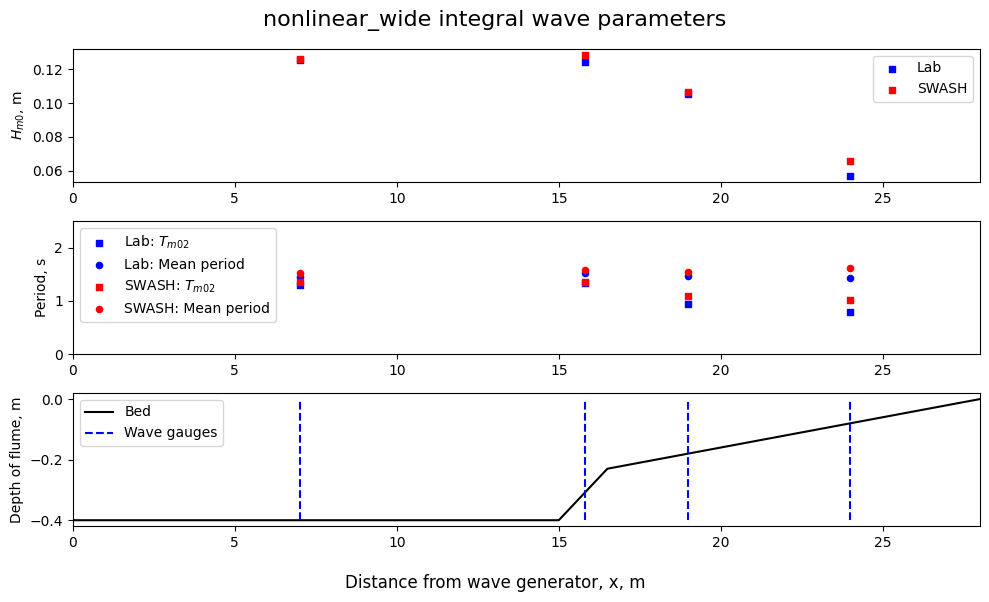

In [13]:
WG4 = gauge_to_pd(WG_files[3], 4, 'WG', False, True)
plot_sig_wave(WG4, 'Run1_nonlinear_wide', 20)

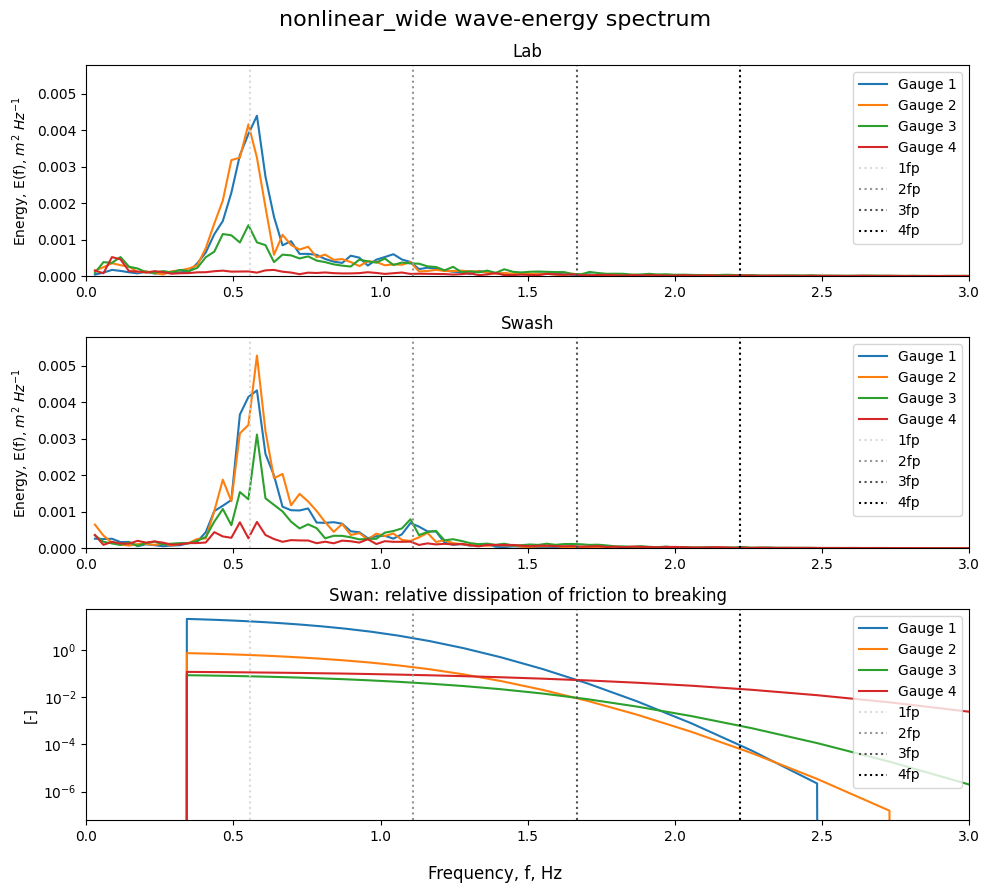

Energy of each gauge in the Lab: [9.82 9.66 6.31 1.93] J / meters squared
m_neg of each gauge in the Lab: [17.86 20.31 14.22  6.73] J * s / meters squared
Energy of each gauge in SWASH: [10.1  10.63  7.24  3.09] J / meters squared
m_neg of each gauge in SWASH: [19.98 22.73 14.24  8.13] J * s / meters squared


In [14]:
plot_freq(WG4, 'Run1_nonlinear_wide', 20)

A gradual decrease of energy can be seen at ($f\simeq0.6 Hz$), from gauge 1 up to gauge 4. There is no real transfer of energy visible to other frequencies. This can be due to the fact that the majority of the waves broke between gauge 3 and 4. There are no relevant triad interactions, because waves are already shoaling before gauge 1. Considering the SWASH simulation, for the main frequency gauge 2 and 3 show a higher peak but an overall dissipation trend can be observed. Moreover, the triad interactions between gauge 1 and 4 are quite negligible. During the experiment, waves breaking before gauge 1 were clearly visible, which is also observed in both lab and SWASH data. 

**Run 2 - Linear waves, wide spectrum**

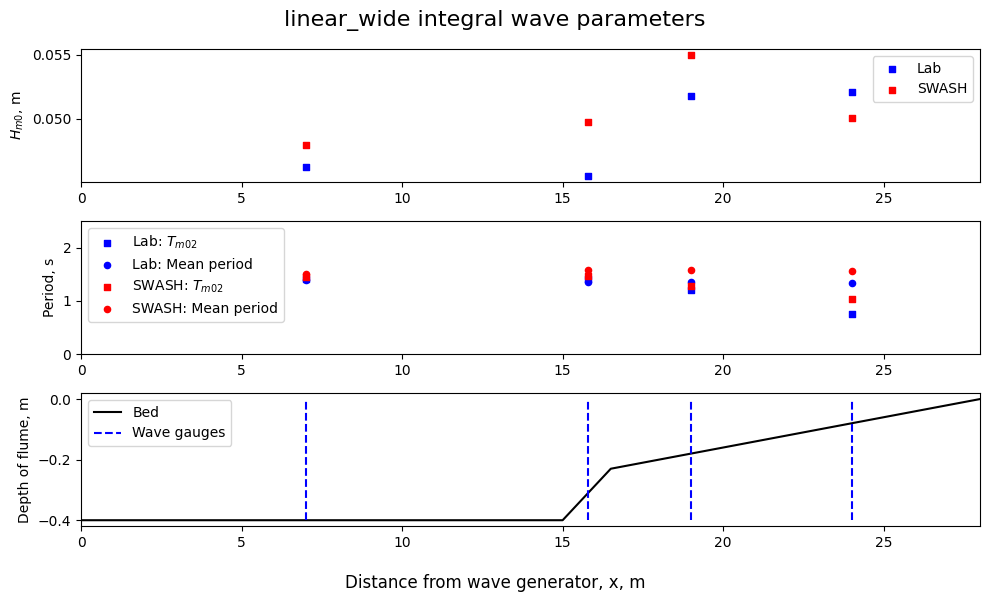

In [15]:
WG3 = gauge_to_pd(WG_files[2], 3, 'WG', False, True)
plot_sig_wave(WG3, 'Run2_linear_wide', 20)

/tmp/ipykernel_364/1413449429.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')


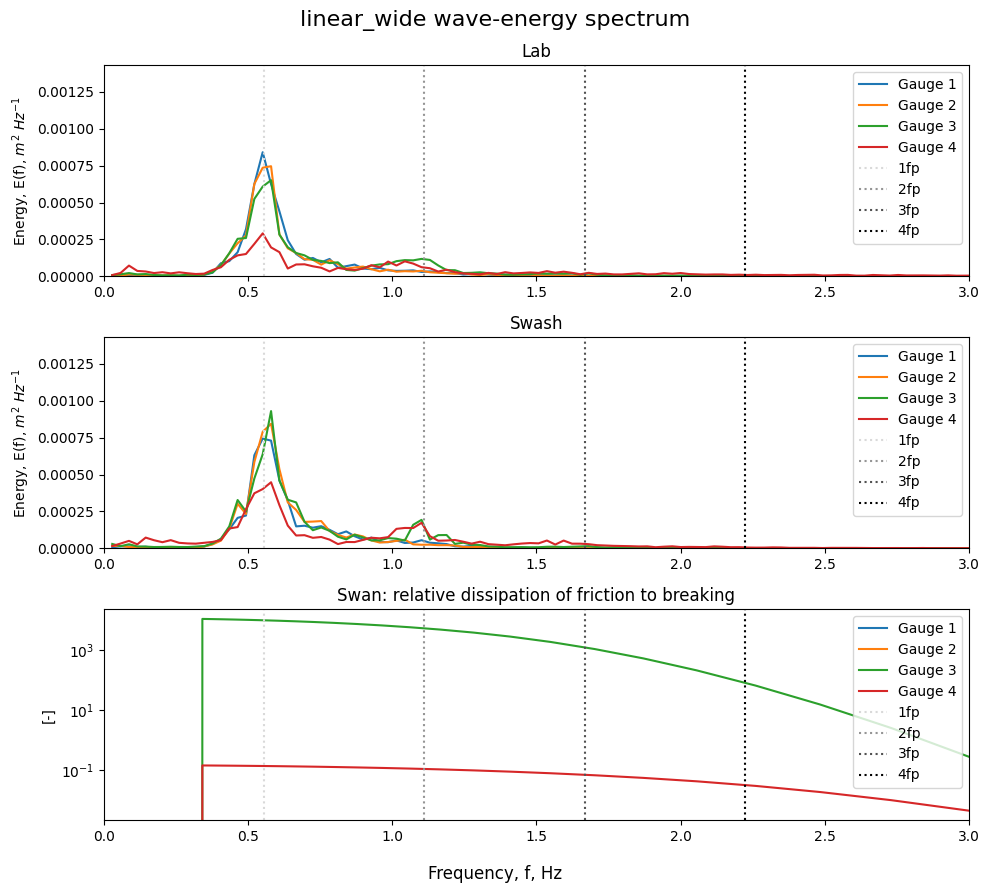

Energy of each gauge in the Lab: [1.41 1.36 1.52 1.12] J / meters squared
m_neg of each gauge in the Lab: [2.41 2.41 2.57 2.03] J * s / meters squared
Energy of each gauge in SWASH: [1.49 1.59 1.76 1.48] J / meters squared
m_neg of each gauge in SWASH: [2.62 2.85 3.1  2.82] J * s / meters squared


In [16]:
plot_freq(WG3, 'Run2_linear_wide', 20)

A gradual decrease of energy can be seen at ($f\simeq0.6 Hz$), from gauge 1 up to gauge 4. For $f\simeq1.1 Hz$ a general increase is observed between gauge 2 and 3 due to triad interactions during shoaling, while between gauge 3 and 4 energy dissipation occurs due to wave breaking. The SWASH simulation shows almost the same general pattern, except for the fact that for $f\simeq1.1 Hz$ no energy dissipation can be observed between gauge 3 and 4 and, therefore, no wave breaking occurs. From visual observations, wave breaking occurred very close to gauge 4, which corresponds with the main dissipation for $f\simeq0.6 Hz$ and the smaller drop for $f\simeq1.1 Hz$.

**Run 3 - Linear waves, narrow spectrum**

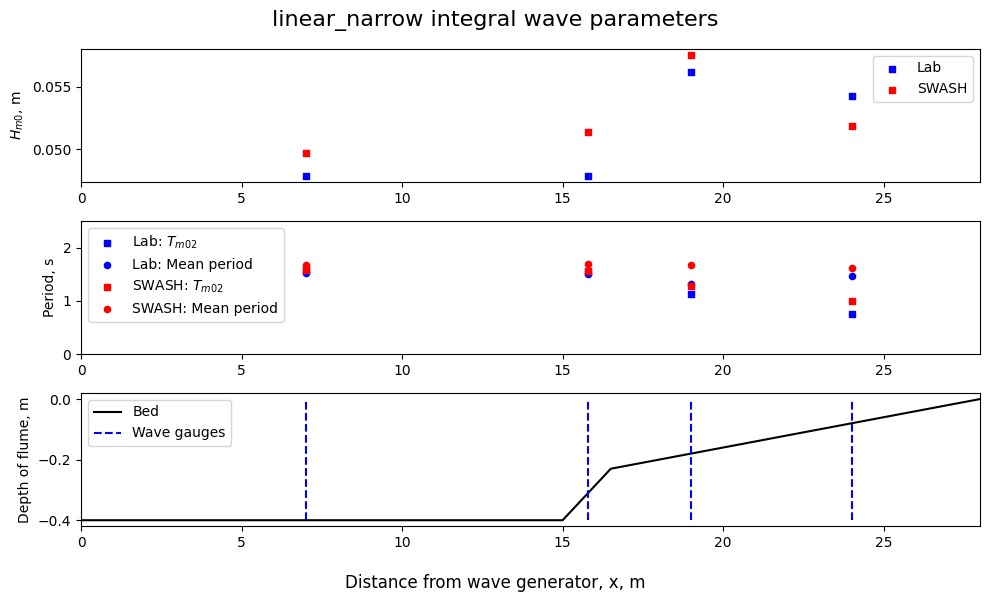

In [17]:
WG1 = gauge_to_pd(WG_files[0], 1, 'WG', False, True)
plot_sig_wave(WG1, 'Run3_linear_narrow', 20)

/tmp/ipykernel_364/1413449429.py:57: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[2].set_yscale('log')


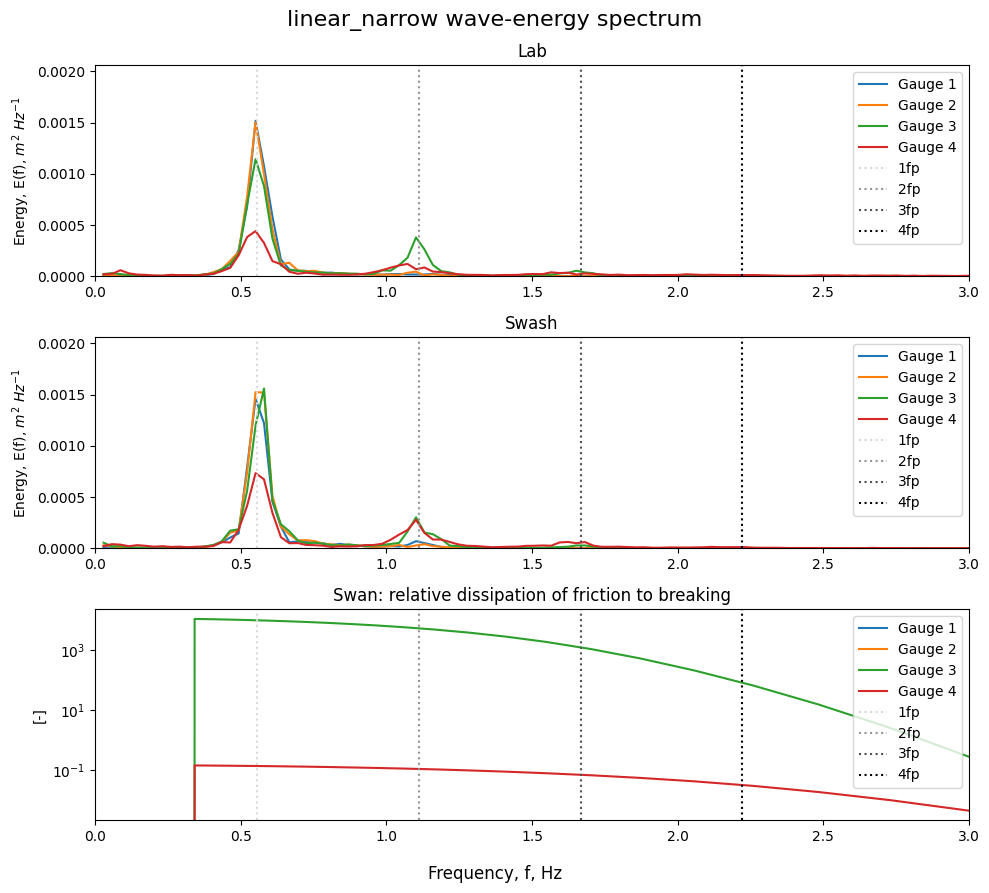

Energy of each gauge in the Lab: [1.46 1.47 1.66 1.08] J / meters squared
m_neg of each gauge in the Lab: [2.62 2.74 2.85 1.94] J * s / meters squared
Energy of each gauge in SWASH: [1.52 1.66 1.83 1.44] J / meters squared
m_neg of each gauge in SWASH: [2.8  3.13 3.32 2.55] J * s / meters squared


In [18]:
plot_freq(WG1, 'Run3_linear_narrow', 20)

It is possible to observe a gradual decrease of the energy peak for the first peak frequency ($f\simeq0.6 Hz$) and at the same time a slight increase occurs for $f_p\simeq1.1 Hz$ between gauge 1 and gauge 3. Then we can observe a energy decrease between gauge 3 & 4, which is in accordance with the visual obervations, where we observe most breaking between gauge 3 and 4.

**Run 4 - Non-linear waves, narrow spectrum**

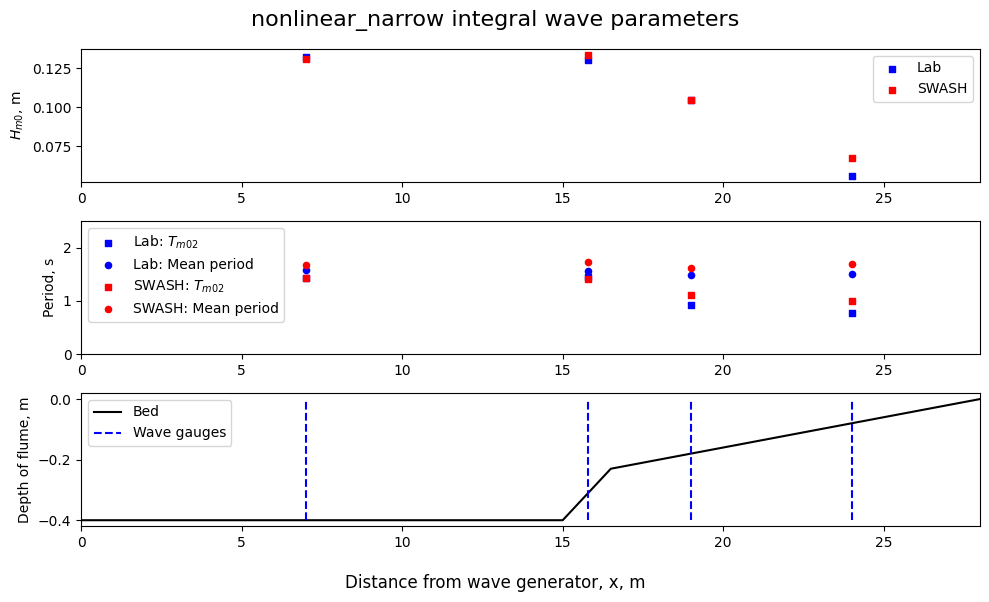

In [19]:
WG2 = gauge_to_pd(WG_files[1], 2, 'WG', False, True)
plot_sig_wave(WG2, 'Run4_nonlinear_narrow', 20)

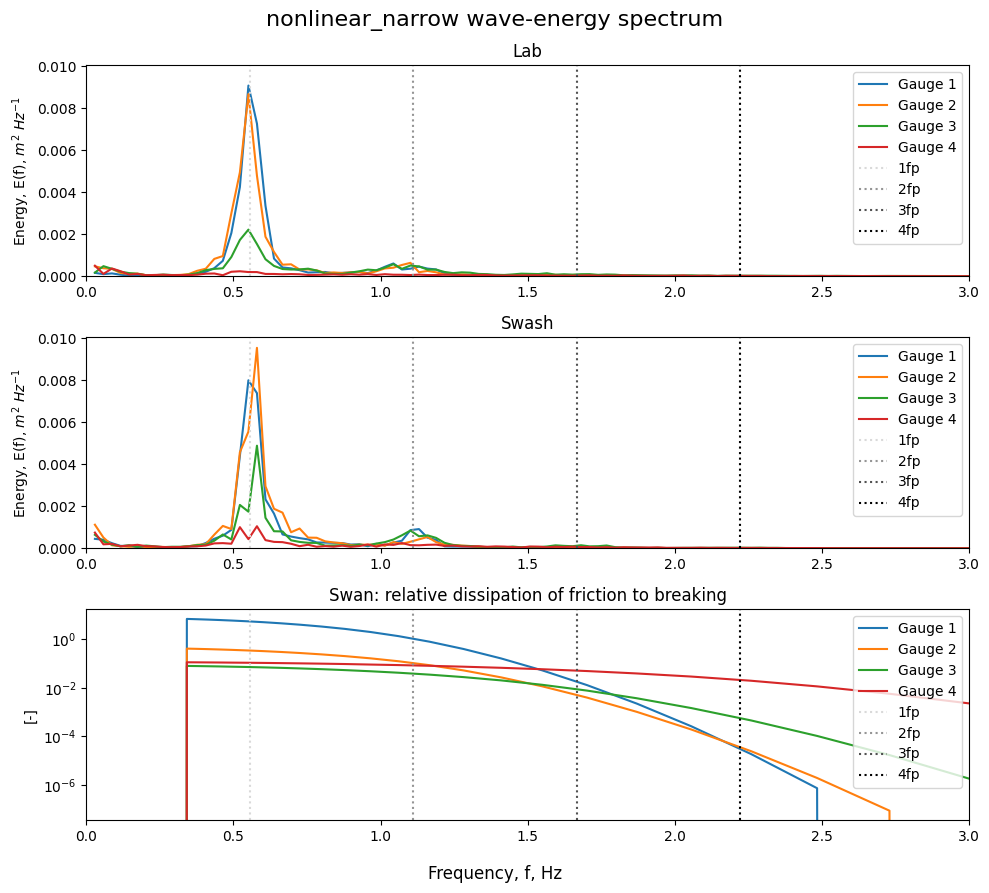

Energy of each gauge in the Lab: [10.2  10.18  5.75  1.78] J / meters squared
m_neg of each gauge in the Lab: [18.98 22.89 13.    7.14] J * s / meters squared
Energy of each gauge in SWASH: [10.18 11.04  6.81  3.03] J / meters squared
m_neg of each gauge in SWASH: [21.8  26.63 15.67  9.98] J * s / meters squared


In [20]:
plot_freq(WG2, 'Run4_nonlinear_narrow', 20)

A decrease in energy is depicted at ($f\simeq0.6 Hz$)  from gauge 1 to 4. Most of the waves break between gauge 2 and 3 . This is consistent with the biggest energy drop that occurs between gauge 2 and 3. Another significant energy drop is visible between gauge 3 and 4, which can be explained by the fact that some waves are still breaking between those gauges. Triad interactions between gauges 1 and 4 are very small and not relevant. Dissipation of energy can also be seen at frequency $f\simeq1.1 Hz$.

**Run 5 - Non-linear waves, wide spectrum, 2nd order waves from the paddle**

For run 5, second-order steering was used for the wave paddle in the lab. Unfortunately, SWASH is not able to replicate this. A solution was found by considering the lab data from the gauge as a boundary condition in SWASH. The data from the lab was imposed on the location of the first gauge in SWASH, and the part of the flume between the wave generator and the first gauge was ignored. Effectively, this means that the flat bed is $7\;m$ shorter. This is visualized in the figure below.

Unfortunately, it proved impossible to compare the energy dissipation related to bed friction and wave breaking for non-linear waves. SWAN is not able to use a timeseries (containing surface elevations), so the solution that was used in SWASH (where the lab data was imposed at gauge 1) can not be applied here. Therefore this part of the analysis is skipped for run 5.

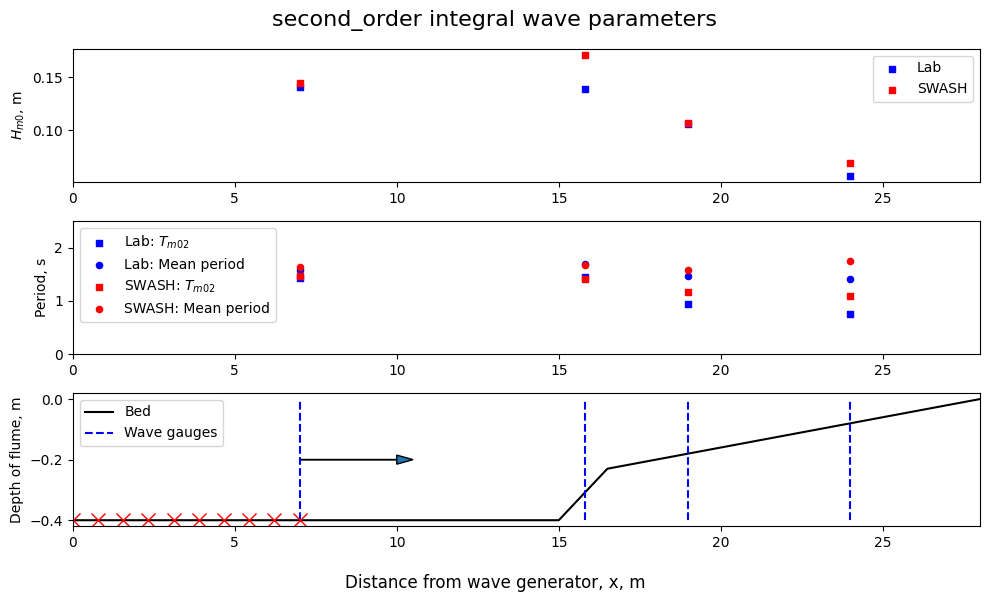

In [21]:
WG5 = gauge_to_pd(WG_files[4], 5, 'WG', False, True)
plot_sig_wave(WG5, 'Run5_second_order', 20)

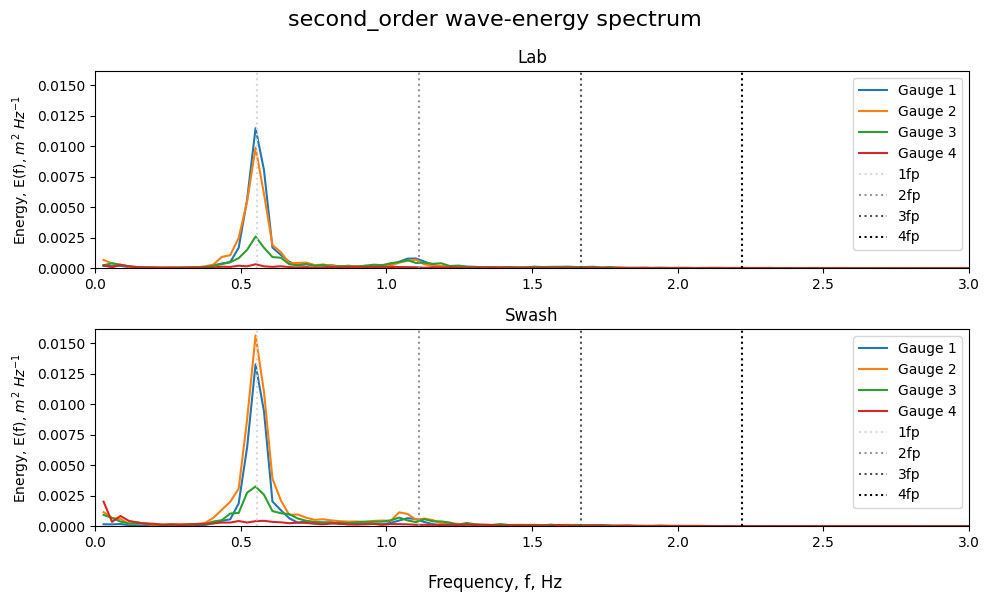

Energy of each gauge in the Lab: [11.16 10.98  5.85  1.71] J / meters squared
m_neg of each gauge in the Lab: [21.24 24.96 12.62  5.14] J * s / meters squared
Energy of each gauge in SWASH: [12.51 18.75  8.2   3.74] J / meters squared
m_neg of each gauge in SWASH: [23.52 43.   22.24 20.89] J * s / meters squared


In [22]:
plot_freq(WG5, 'Run5_second_order', 20)

The only difference between this and the previous run lays in the paddle generator, which is now set to create 2<sup>nd</sup> order Stokes waves from the beginning. Indeed, the overall trend of both cases is the same: it is possible to observe some infragravity waves, waves breaking for $f\simeq0.6\;Hz$ mainly between gauge 2 and 3 and triad interactions for $f\simeq1.1\;Hz$.
The main evidence we can notice is that for run 5 the energy peak for $f\simeq0.6\;Hz$ is larger than for run 4, especially for gauges 1 and 2 but also for gauge 3. The same consideration still holds for the triad interaction. 

##### 4.3. Lab - SWASH data comparison

When comparing the experimental data with the SWASH data, it immediately stands out that $T_{m02}$ for the SWASH runs and the experimental data are not in accordance. This can be explained as follows. $T_{m02}$ was calculated using the spectral moments, using $T_{m02}=\sqrt{m_0 / m_2}$. This formula assumes that the probability density function of the surface elevation is Gaussian distributed. This assumption is fine for deep water. In shallow water however, the effects of this can be noticed quite clearly. A decline can be observed for the period (for both the SWASH simulation and the experimental data) for gauge 3 and gauge 4. This decline is greater for the lab data, which implies that this data is more non-linear. 
For gauge 4, additional breaking effects start happening. The waves in the SWASH simulation start breaking later in comparison to the lab data. This explains why the discrepency in $T_{m02}$ increases even further after gauge 3.

In the lab experiments the breaking occurred earlier compared to SWASH simulations. In fact, for the latter the energy peak at gauge 2 is higher than at gauge 1 and this can be due to the fact that waves shoal longer and break later, which results in more energy at gauge 2. In order to make SWASH simulations better resemble the lab results, the breaking parameter should be adjusted accordingly.

In almost all cases, and especially for those with non-linear waves, SWASH simulations tend to reach higher energy peaks for $f\simeq0.6\;Hz$ ($f_p$), $f\simeq1.1\;Hz$ ($2*f_p$), and for infragravity waves the same pattern holds as well.

##### 4.4. Lab - SWAN data comparison
Now consider the plots comparing the relative influence of bed friction against wave breaking. 

Clearly bed friction is most important for gauge 1, as waves have not started breaking yet. In the case of linear waves, SWAN estimates that breaking only occurs after gauge 3. Moreover, the effect of friction is more or less constant for the different gauges. Therefore, on a log scale, it seems that the influence of friction is same for the first three gauges. Once dissipation occurs because of breaking, at gauge 4, there is a clear change in the effect of friction. 

In the case of non linear waves, friction is no longer spatially constant. Moreover, some dissipation already occures at gauge 2. Interestingly, gauge 4 doesn't have the largerst breaking influence, this is due to the fact that friction is also at its largest at this location. Additionally, friction is at it's smallest at gauge 3. 

For narrow spectrums, the relative influence of friction is smaller for all gauges. When directly comparing linear and non linear waves, it is clear that the influence of friction is larger on linear waves. 

Desimilar to SWASH, it was not possible for the second-order waves to be simulated in SWAN, as it was not possible to upload the timeseries of gauge 1.

#### 5. Discussion
In this section the sub-questions as previously defined in _Section 1_ are answered based on the results obtained from the lab experiments.

_1) Is the wave breaking frequency dependent?_

Wave breaking only partially depends on frequency. Indeed, for very high frequencies (small periods), waves can be too steep and eventually break earlier. For run 1 and 4 we do not observe any dependency between wave breaking and frequency because, apart from $f\simeq0.6\;Hz$, energy lines are almost equally spaced over the whole domain. For run 2 and 3 we do see more dependance, but still it occurs at the second peak frequency and it's not related to the whole domain. 

Moreover, infragravity waves generated by the triads will have a small amplitude. Therefore, they will break later as they will require a smaller water depth. The energy associated with this frequency will dissipate at a distance further into the flume. This can be investigated by using the -1 spectral moment $m_{-1}$ which gives a larger weight to the lower frequencies. However, the close proximity of the infragravity waves to $f_p$ has an effect on $m_{-1}$. When large dissipation at the peak frequency occurs, $m_{-1}$ decreases even though the infragravity waves have a larger peak frequency. This has to do with the weighting function of the $m_{-1}$ and the total energy at the infragravity waves and at $f_p$.


_2) How does the Iribarren number affect the energy distribution during breaking?_

We can see how the Iribarren number $ξ$ affects the energy distribution during breaking by looking at run 1 and 2, where the conditions are the same except for the Iribarren number $ξ$, the Ursell number $N_{Ur}$, and the wave height $H_s$. The Iribarren number is respectively 0.68 and 0.22 for run 1 and 2, which means some plunging breakers are present in the first run together with some spillers, while in the second run only spilling breakers are present. For the plunging breaker type more energy is dissipated, whereas more energy is retained in the spilling breaker type due to the presence of spillers. For the case with the lower Iribarren number,i.e. second run, energy decrease between gauges 2 and 4 shows a more gradual trend, while for a higher Iribarren number, the decrease is more abrupt. This observation could also be due to the fact that nonlinear waves (larger wave height) break earlier in the flume (this can be seen in the integral wave parameters which shows that the surf zone is in between gauges 2 and 3 for run 1,  and gauges 3 and 4 for run 2).

It can be concluded that when some plungers are present in a wave series (meaning the Iribarren number goes higher than 0.5 and smaller than 3.3), more energy dissipation can be expected compared to wave series of only spillers (Iribarren number smaller than 0.5). 

We did not observe any collapsing or surging waves because we did not create the required conditions (i.e. appropriate beach slope and wave steepness), hence no data is available regarding energy dissipation for these kind of breaking waves. 


_3) What is the effect of (non-)linearity of a wave field on energy dissipation due to bed friction?_

As stated previously in _Sub-question 2)_, for linear waves the breaking mainly occurs between gauge 3 and 4, where we observe the largest energy decrease, although it is possible to notice that waves still have some energy left when they reach gauge 4. This might be due to the fact that waves linearity leads to a smaller variance in wave height and eventually in energy dissipation as well. On the other hand, for the non-linear ones, breaking clearly occurs between gauge 2 and 3 and after the latter almost no energy is left.

Since the bed friction both for lab experiments and SWASH simulations is quite low we can not investigate its effect on energy dissipation. However the SWAN simulations can resolve all the dissipation components, including the friction. By using a SWAN simulation, a prediction could be formed about the effect of bed friction on the energy dissipation. Here, it is important to state that the SWAN model uses another friction parameter than SWASH. Therefore it is not possible to fully rely on the SWASH or SWAN results. SWAN is able to predict that bed friction has relatively more effect on the linear waves in comparison to the non-linear waves. This is because the linear wave field contains less overall energy, and the surf zone starts later in the flume. Therefore, friction dominates the energy dissipation for the first three gauges for linear waves.

_4) How do triad-wave interaction affect the energy distribution during shoaling?_

Triad wave interactions redistribute energy over the spectrum. They only occur when the wave enters relatively shallow water. They transfer energy from lower frequencies to higher frequencies, and generate infragravity waves. The energy transfer carried out by triad wave interactions in very shallow water can change single peaked spectra into multiple peaked spectra, which are multiples of the peak frequency, which depends on the nonlinearity of the wave field. This is because, when random waves approach the surf zone, Stokes waves are generated.

In our simulations, this is quite evident for run 3, where a clear transfer of energy to higher frequencies from gauge 2 to 3 can be seen, which corresponds to the shoaling zone. A similiar behaviour is seen in run 1 and 2, but to less evident extent because a wider JONSWAP spectrum is used in these cases. A wider variety of frequencies corresponds to a less peaked and wider energy spectrum. Therefore, transfer of energy is more spread out, which results in a less visible change in the peaks. This is because the transfer of energy is really dependent on the variance of energy, which is higher for a narrow spectrum. 



#### 6. Conclusions and recommendations

##### 6.1. Conclusions
The main purpose of our work was to investigate how properties of a wave field affect its energy distribution when near shore conditions are encountered. To this purpose, five runs were carried out with different wave parametes, as indicated in the table in _Section 3.1_. Energy distribution can be investigated with the energy balance equation as stated in _Section 2.1_.

The first phenomenon investigated was the triad-wave interactions, which only occur once waves enter relatively shallow water conditions and start shoaling. Energy distribution is highly affected by these interactions as the latter are responsible for energy transfer from lower to higher frequencies and for the formation of infragravity waves. Hence, a redistribution of energy is the direct effect of triad wave interactions, which results in multiple-peaked energy spectra. Furthermore, the width of the spectrum also influences energy distribution, with wider energy distribution resulting for spectrum with lower values of the JONSWAP spectrum parameter. The reason for this is that energy distribution and transfer depends on variance of energy, which increases if reducing the width of the spectrum of the wave field. 

Moreover, energy distribution results seem to be highly affected by the steepness of the waves, which was investigated by considering different Iribarren numbers. The latter is bigger for smaller wave steepness since bed conditions are fixed, meaning that the bed slope does not change from one run another. It was shown that more energy is dissipated when the Iribarren number increases, hence when wave steepness decreases. On the other hand, more energy is retained for lower a Iribarren number, which is demonstrated by the formation of spillers in spilling breakers. The decrease in energy is also generally more gentle in the case of lower Iribarren numbers. 

Energy dissipation due to breaking also occurs earlier for smaller wave periods, because in this case waves become too steep and the breaking occurs earlier in space and farther from the shore. On the other hand, smaller amplitudes in waves result in depth-induced breaking with resulting energy dissipation closer to the shore. 

Linearity was investigated by modifying the JONSWAP parameter. Linear wave fields also lead to breaking closer to the shore than non-linear ones. The result is that energy dissipation in the considered linear wave fields occurs within a longer spatial range (with some energy left even very close to the shore). The non-linear wave fields energy is dissipated earlier and further from the shore, whith little to no energy reaching the beach. 

In the end, the effect of bottom friction on energy dissipation was not investigated deep enough to produce sufficient conclusions. This was due to the unfeasibility of changing friction conditions in the Flume lab session. Nevertheless, in the SWAN output of the run with default friction coefficient of SWAN, it can be observed that its effect becomes more important in dissipating energy in case of linear waves, while it is less relevant for non-linear wave fields. 


##### 6.2. Recommendations
The obtained results are satisfactory and appropriate to answer the main question and the related sub-questions that we intended to investigate. Nevertheless, there is lack of data available with regards to some of the wave field parameters and conditions. Additionally, phase lag could not be quantified because a time series analysis would be necessary to do so, while our work focused on frequency domain analysis.

Furthermore, quadruplet wave-wave interactions were not investigated. Since these interactions are the dominant mechanism of interaction among non linear wave-wave interactions, we expect them to contribute to the energy (re)distribution. 

Conditions for different bed friction were investigated only through a SWAN simulation, while all other simulations were carried out by SWASH, which uses a different friction parameter. Also, in the lab session it was not possible for us to change bed friction conditions. Due to this, it was not possible to conclude much about influence of bed friction on energy dissipation. It is suggested to analyze also the other runs with SWAN, and carry out experiments in the flume with different bed frictions in order to have a better understanding of its influence on energy dissipation, and to confirm what observed in the first SWAN run.


#### 7. References
- Holthuijsen, L. (2010). Waves in Oceanic and Coastal Waters. Delft: Cambridge University Press.
- Tissier, M., Reniers, A., & Arriaga, J. (2023). Waves Lectures Slides. Delft.
- Bosboom, J., & Stive, M. (2022). Coastal Dynamics. Delft: TU Delft Open.

#### 8. Appendix

In this section both SWASH and SWAN input files are included for each run. SWASH files are of type _.sws_, while SWAN files are of type _.swn_.

The bed profile files are included as well. These profiles have been used both for SWASH and SWAN and the only difference between the first and the second file was previously explained in _Section 4.2 Data analysis_ for Run 5. Bed profile are of type _.bot_.

Eventually, the input files for the wave generator of the lab are included.

##### 8.1. Run 1 - SWASH input file

MODE ONEDIMENSIONAL
CGRID  0.   0.   0. 40. 0. 400 0
VERT 3

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

NONHYDROSTATIC
BREAK 
VISCOSITY VERTICAL KEPS 
FRIC MANNING 0.010

SET LEVEL = 0.40 

BOUNd SHAPespec JONswap 3.3 SIG PEAK DSPR DEGR
BOUNdcond SIDE W CCW BTYPE WEAK ADDBoundwave CON SPECTRUM 0.135 1.8 90 0 001000

DISCRET UPW MOM
TIMEI 0.4 0.8

!************ OUTPUT REQUESTS *************************

POINTS 'GAUGE1' 7.  0 
TABLE  'GAUGE1' HEAD 'gauge1_run1.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE2' 15.8  0 
TABLE  'GAUGE2' HEAD 'gauge2_run1.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE3' 19.  0 
TABLE  'GAUGE3' HEAD 'gauge3_run1.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE4' 24.  0 
TABLE  'GAUGE4' HEAD 'gauge4_run1.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE5' 27.3  0 
TABLE  'GAUGE5' HEAD 'gauge5_run1.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

GROUP 'grp' SUBGrid 1 400 1 1 
TABLE 'grp' NOHEAD 'grid_output_run1.tbl' TSEC  XP WATLEV BOTLEV VEL DEPTH OUTPUT 000000.000 0.1 SEC

COMPUTE 000000.000 0.025 SEC 001500.000

STOP

##### 8.2. Run 2 - SWASH input file

MODE ONEDIMENSIONAL
CGRID  0.   0.   0. 40. 0. 400 0
VERT 3

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

NONHYDROSTATIC
BREAK 
VISCOSITY VERTICAL KEPS 
FRIC MANNING 0.010

SET LEVEL = 0.40 

BOUNd SHAPespec JONswap 3.3 SIG PEAK DSPR DEGR
BOUNdcond SIDE W CCW BTYPE WEAK ADDBoundwave CON SPECTRUM 0.05 1.8 90 0 001000

DISCRET UPW MOM
TIMEI 0.4 0.8

!************ OUTPUT REQUESTS *************************

POINTS 'GAUGE1' 7.  0 
TABLE  'GAUGE1' HEAD 'gauge1_run2.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE2' 15.8  0 
TABLE  'GAUGE2' HEAD 'gauge2_run2.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE3' 19.  0 
TABLE  'GAUGE3' HEAD 'gauge3_run2.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE4' 24.  0 
TABLE  'GAUGE4' HEAD 'gauge4_run2.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE5' 27.3  0 
TABLE  'GAUGE5' HEAD 'gauge5_run2.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

GROUP 'grp' SUBGrid 1 400 1 1 
TABLE 'grp' NOHEAD 'grid_output_run2.tbl' TSEC  XP WATLEV BOTLEV VEL DEPTH OUTPUT 000000.000 0.1 SEC

COMPUTE 000000.000 0.025 SEC 001500.000

STOP

##### 8.3. Run 3 - SWASH input file

MODE ONEDIMENSIONAL
CGRID  0.   0.   0. 40. 0. 400 0
VERT 3

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

NONHYDROSTATIC
BREAK 
VISCOSITY VERTICAL KEPS 
FRIC MANNING 0.010

SET LEVEL = 0.4

BOUNd SHAPespec JONswap 20 SIG PEAK DSPR DEGR
BOUNdcond SIDE W CCW BTYPE WEAK ADDBoundwave CON SPECTRUM 0.05 1.8 90 0 001000

DISCRET UPW MOM
TIMEI 0.4 0.8

!**** OUTPUT REQUESTS *********

POINTS 'GAUGE1' 7.  0 
TABLE  'GAUGE1' HEAD 'gauge1_run3.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE2' 15.8  0 
TABLE  'GAUGE2' HEAD 'gauge2_run3.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE3' 19.  0 
TABLE  'GAUGE3' HEAD 'gauge3_run3.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE4' 24.  0 
TABLE  'GAUGE4' HEAD 'gauge4_run3.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE5' 27.3  0 
TABLE  'GAUGE5' HEAD 'gauge5_run3.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

GROUP 'grp' SUBGrid 1 400 1 1 
TABLE 'grp' NOHEAD 'grid_output_run3.tbl' TSEC  XP WATLEV BOTLEV VEL DEPTH OUTPUT 000000.000 0.1 SEC

COMPUTE 000000.000 0.025 SEC 001500.000

STOP

##### 8.4. Run 4 - SWASH input file

MODE ONEDIMENSIONAL
CGRID  0.   0.   0. 40. 0. 400 0
VERT 3

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

NONHYDROSTATIC
BREAK 
VISCOSITY VERTICAL KEPS 
FRIC MANNING 0.010

SET LEVEL = 0.4

BOUNd SHAPespec JONswap 20 SIG PEAK DSPR DEGR
BOUNdcond SIDE W CCW BTYPE WEAK ADDBoundwave CON SPECTRUM 0.135 1.8 90 0 001000

DISCRET UPW MOM
TIMEI 0.4 0.8

!**** OUTPUT REQUESTS *********

POINTS 'GAUGE1' 7.  0 
TABLE  'GAUGE1' HEAD 'gauge1_run4.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE2' 15.8  0 
TABLE  'GAUGE2' HEAD 'gauge2_run4.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE3' 19.  0 
TABLE  'GAUGE3' HEAD 'gauge3_run4.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE4' 24.  0 
TABLE  'GAUGE4' HEAD 'gauge4_run4.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE5' 27.3  0 
TABLE  'GAUGE5' HEAD 'gauge5_run4.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

GROUP 'grp' SUBGrid 1 400 1 1 
TABLE 'grp' NOHEAD 'grid_output_run4.tbl' TSEC  XP WATLEV BOTLEV VEL DEPTH OUTPUT 000000.000 0.1 SEC

COMPUTE 000000.000 0.025 SEC 001500.000

STOP

##### 8.5. Run 5 - SWASH input file

MODE ONEDIMENSIONAL
CGRID  0.   0.   0. 40. 0. 400 0
VERT 3

INPGRID BOTTOM 0. 0. 0. 659 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

NONHYDROSTATIC
BREAK 
VISCOSITY VERTICAL KEPS 
FRIC MANNING 0.010

SET LEVEL = 0.40 

!BOUNd SHAPespec JONswap 3.3 SIG PEAK DSPR DEGR
BOUNdcond SIDE W CCW BTYPE WLEV ADDBoundwave CONstant SERIES 'WG5_ascii.txt'

DISCRET UPW MOM
TIMEI 0.4 0.8

!************ OUTPUT REQUESTS *************************

POINTS 'GAUGE1' 0.  0 
TABLE  'GAUGE1' HEAD 'gauge1_run5.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE2' 8.8  0 
TABLE  'GAUGE2' HEAD 'gauge2_run5.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE3' 12.  0 
TABLE  'GAUGE3' HEAD 'gauge3_run5.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE4' 17.  0 
TABLE  'GAUGE4' HEAD 'gauge4_run5.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

POINTS 'GAUGE5' 20.3  0 
TABLE  'GAUGE5' HEAD 'gauge5_run5.tbl' TSEC WATLEV VEL OUTPUT 000000.000 0.05 SEC

!GROUP 'grp' SUBGrid 1 400 1 1 
!TABLE 'grp' NOHEAD 'grid_output_run5.tbl' TSEC  XP WATLEV BOTLEV VEL DEPTH OUTPUT 000000.000 0.1 SEC

COMPUTE 000000.000 0.025 001500.000

STOP

##### 8.6. Run 1 - SWAN input file

PROJ 'Experiments' '1'

MODE STAT ONED
CGRID  0.   0.   0. 40. 0. 400 0 CIRCLE 180 0.1 3.0 

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

SET DEPMIN = 0.01

SET LEVEL=0.40

BOUN SHAPE JON 3.3 PEAK DSPR POWER
BOUN SIDE W CCW CON PAR 0.05 1.8 0. 300.

OFF QUAD
OFF WCAP
BREAK 1.0 0.8
FRICTION 
TRIAD
SETUP

CURVE  'LINE1' 0. 0. 40 40. 0.

TABLE  'LINE1' HEAD 'output.tab' XP HS RTPEAK DIR DEPTH SETUP DISSIP QB
SPECout 'LINE1' SPEC1D 'spectra.spc'

TEST 1 0 POINTS XY 7. 0. 15.8 0. 19. 0. 24. 0. 27.3 0. S1D 'sourceterms'

COMPUTE NONST 00000000.000000 0.025 00000000.001500
STOP

##### 8.7. Run 2 - SWAN input file

PROJ 'Experiments' '1'

MODE STAT ONED
CGRID  0.   0.   0. 40. 0. 400 0 CIRCLE 180 0.1 3.0 

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

SET DEPMIN = 0.01

SET LEVEL=0.40

BOUN SHAPE JON 3.3 PEAK DSPR POWER
BOUN SIDE W CCW CON PAR 0.05 1.8 0. 300.

OFF QUAD
OFF WCAP
BREAK 1.0 0.8
FRICTION 
TRIAD
SETUP

CURVE  'LINE1' 0. 0. 40 40. 0.

TABLE  'LINE1' HEAD 'output.tab' XP HS RTPEAK DIR DEPTH SETUP DISSIP QB
SPECout 'LINE1' SPEC1D 'spectra.spc'

TEST 1 0 POINTS XY 7. 0. 15.8 0. 19. 0. 24. 0. 27.3 0. S1D 'sourceterms'

COMPUTE NONST 00000000.000000 0.025 00000000.001500
STOP

##### 8.8. Run 3 - SWAN input file

PROJ 'Experiments' '1'

MODE STAT ONED
CGRID  0.   0.   0. 40. 0. 400 0 CIRCLE 180 0.1 3.0 

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

SET DEPMIN = 0.01

SET LEVEL=0.40

BOUN SHAPE JON 20 PEAK DSPR POWER
BOUN SIDE W CCW CON PAR 0.05 1.8 0. 300.

OFF QUAD
OFF WCAP
BREAK 1.0 0.8
FRICTION 
TRIAD
SETUP

CURVE  'LINE1' 0. 0. 40 40. 0.

TABLE  'LINE1' HEAD 'output.tab' XP HS RTPEAK DIR DEPTH SETUP DISSIP QB
SPECout 'LINE1' SPEC1D 'spectra.spc'

TEST 1 0 POINTS XY 7. 0. 15.8 0. 19. 0. 24. 0. 27.3 0. S1D 'sourceterms'

COMPUTE NONST 00000000.000000 0.025 00000000.001500
STOP

##### 8.9. Run 4 - SWAN input file

PROJ 'Experiments' '1'

MODE STAT ONED
CGRID  0.   0.   0. 40. 0. 400 0 CIRCLE 180 0.1 3.0 

INPGRID BOTTOM 0. 0. 0. 800 0 0.05 0.
READINPUT BOTTOM  1. 'bed_profile.bot' 1 0 FREE

SET DEPMIN = 0.01

SET LEVEL=0.40

BOUN SHAPE JON 20 PEAK DSPR POWER
BOUN SIDE W CCW CON PAR 0.135 1.8 0. 300.

OFF QUAD
OFF WCAP
BREAK 1.0 0.8
FRICTION 
TRIAD
SETUP

CURVE  'LINE1' 0. 0. 40 40. 0.

TABLE  'LINE1' HEAD 'output.tab' XP HS RTPEAK DIR DEPTH SETUP DISSIP QB
SPECout 'LINE1' SPEC1D 'spectra.spc'

TEST 1 0 POINTS XY 7. 0. 15.8 0. 19. 0. 24. 0. 27.3 0. S1D 'sourceterms'

COMPUTE NONST 00000000.000000 0.025 00000000.001500
STOP



##### 8.10. Bottom profile for Run 1 - 4

-0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -3.3333333e-03
  -8.8888889e-03
  -1.4444444e-02
  -2.0000000e-02
  -2.5555556e-02
  -3.1111111e-02
  -3.6666667e-02
  -4.2222222e-02
  -4.7777778e-02
  -5.3333333e-02
  -5.8888889e-02
  -6.4444444e-02
  -7.0000000e-02
  -7.5555556e-02
  -8.1111111e-02
  -8.6666667e-02
  -9.2222222e-02
  -9.7777778e-02
  -1.0333333e-01
  -1.0888889e-01
  -1.1444444e-01
  -1.2000000e-01
  -1.2555556e-01
  -1.3111111e-01
  -1.3666667e-01
  -1.4222222e-01
  -1.4777778e-01
  -1.5066667e-01
  -1.5177778e-01
  -1.5288889e-01
  -1.5400000e-01
  -1.5511111e-01
  -1.5622222e-01
  -1.5733333e-01
  -1.5844444e-01
  -1.5955556e-01
  -1.6066667e-01
  -1.6177778e-01
  -1.6288889e-01
  -1.6400000e-01
  -1.6511111e-01
  -1.6622222e-01
  -1.6733333e-01
  -1.6844444e-01
  -1.6955556e-01
  -1.7066667e-01
  -1.7177778e-01
  -1.7288889e-01
  -1.7400000e-01
  -1.7511111e-01
  -1.7622222e-01
  -1.7733333e-01
  -1.7844444e-01
  -1.7955556e-01
  -1.8066667e-01
  -1.8177778e-01
  -1.8288889e-01
  -1.8400000e-01
  -1.8511111e-01
  -1.8622222e-01
  -1.8733333e-01
  -1.8844444e-01
  -1.8955556e-01
  -1.9066667e-01
  -1.9177778e-01
  -1.9288889e-01
  -1.9400000e-01
  -1.9511111e-01
  -1.9622222e-01
  -1.9733333e-01
  -1.9844444e-01
  -1.9955556e-01
  -2.0066667e-01
  -2.0177778e-01
  -2.0288889e-01
  -2.0400000e-01
  -2.0511111e-01
  -2.0622222e-01
  -2.0733333e-01
  -2.0844444e-01
  -2.0955556e-01
  -2.1066667e-01
  -2.1177778e-01
  -2.1288889e-01
  -2.1400000e-01
  -2.1511111e-01
  -2.1622222e-01
  -2.1733333e-01
  -2.1844444e-01
  -2.1955556e-01
  -2.2066667e-01
  -2.2177778e-01
  -2.2288889e-01
  -2.2400000e-01
  -2.2511111e-01
  -2.2622222e-01
  -2.2733333e-01
  -2.2844444e-01
  -2.2955556e-01
  -2.3066667e-01
  -2.3177778e-01
  -2.3288889e-01
  -2.3400000e-01
  -2.3511111e-01
  -2.3622222e-01
  -2.3733333e-01
  -2.3844444e-01
  -2.3955556e-01
  -2.4066667e-01
  -2.4177778e-01
  -2.4288889e-01
  -2.4400000e-01
  -2.4511111e-01
  -2.4622222e-01
  -2.4733333e-01
  -2.4844444e-01
  -2.4955556e-01
  -2.5066667e-01
  -2.5177778e-01
  -2.5288889e-01
  -2.5400000e-01
  -2.5511111e-01
  -2.5622222e-01
  -2.5733333e-01
  -2.5844444e-01
  -2.5955556e-01
  -2.6066667e-01
  -2.6177778e-01
  -2.6288889e-01
  -2.6400000e-01
  -2.6511111e-01
  -2.6622222e-01
  -2.6733333e-01
  -2.6844444e-01
  -2.6955556e-01
  -2.7066667e-01
  -2.7177778e-01
  -2.7288889e-01
  -2.7400000e-01
  -2.7511111e-01
  -2.7622222e-01
  -2.7733333e-01
  -2.7844444e-01
  -2.7955556e-01
  -2.8066667e-01
  -2.8177778e-01
  -2.8288889e-01
  -2.8400000e-01
  -2.8511111e-01
  -2.8622222e-01
  -2.8733333e-01
  -2.8844444e-01
  -2.8955556e-01
  -2.9066667e-01
  -2.9177778e-01
  -2.9288889e-01
  -2.9400000e-01
  -2.9511111e-01
  -2.9622222e-01
  -2.9733333e-01
  -2.9844444e-01
  -2.9955556e-01
  -3.0066667e-01
  -3.0177778e-01
  -3.0288889e-01
  -3.0400000e-01
  -3.0511111e-01
  -3.0622222e-01
  -3.0733333e-01
  -3.0844444e-01
  -3.0955556e-01
  -3.1066667e-01
  -3.1177778e-01
  -3.1288889e-01
  -3.1400000e-01
  -3.1511111e-01
  -3.1622222e-01
  -3.1733333e-01
  -3.1844444e-01
  -3.1955556e-01
  -3.2066667e-01
  -3.2177778e-01
  -3.2288889e-01
  -3.2400000e-01
  -3.2511111e-01
  -3.2622222e-01
  -3.2733333e-01
  -3.2844444e-01
  -3.2955556e-01
  -3.3066667e-01
  -3.3177778e-01
  -3.3288889e-01
  -3.3400000e-01
  -3.3511111e-01
  -3.3622222e-01
  -3.3733333e-01
  -3.3844444e-01
  -3.3955556e-01
  -3.4066667e-01
  -3.4177778e-01
  -3.4288889e-01
  -3.4400000e-01
  -3.4511111e-01
  -3.4622222e-01
  -3.4733333e-01
  -3.4844444e-01
  -3.4955556e-01
  -3.5066667e-01
  -3.5177778e-01
  -3.5288889e-01
  -3.5400000e-01
  -3.5511111e-01
  -3.5622222e-01
  -3.5733333e-01
  -3.5844444e-01
  -3.5955556e-01
  -3.6066667e-01
  -3.6177778e-01
  -3.6288889e-01
  -3.6400000e-01
  -3.6511111e-01
  -3.6622222e-01
  -3.6733333e-01
  -3.6844444e-01
  -3.6955556e-01
  -3.7066667e-01
  -3.7177778e-01
  -3.7288889e-01
  -3.7400000e-01
  -3.7511111e-01
  -3.7622222e-01
  -3.7733333e-01
  -3.7844444e-01
  -3.7955556e-01
  -3.8066667e-01
  -3.8177778e-01
  -3.8288889e-01
  -3.8400000e-01
  -3.8511111e-01
  -3.8622222e-01
  -3.8733333e-01
  -3.8844444e-01
  -3.8955556e-01
  -3.9066667e-01
  -3.9177778e-01
  -3.9288889e-01
  -3.9400000e-01
  -3.9511111e-01
  -3.9622222e-01
  -3.9733333e-01
  -3.9844444e-01
  -3.9955556e-01
  -4.0066667e-01
  -4.0177778e-01
  -4.0288889e-01
  -4.0400000e-01
  -4.0511111e-01
  -4.0622222e-01
  -4.0733333e-01
  -4.0844444e-01
  -4.0955556e-01
  -4.1066667e-01
  -4.1555556e-01
  -4.2944444e-01
  -4.4333333e-01
  -4.5722222e-01
  -4.7111111e-01
  -4.8500000e-01
  -4.9888889e-01
  -5.1277778e-01
  -5.2666667e-01
  -5.4055556e-01
  -5.5444444e-01
  -5.6833333e-01
  -5.8222222e-01
  -5.9611111e-01
  -6.1000000e-01
  -6.2388889e-01
  -6.3777778e-01
  -6.5166667e-01
  -6.6555556e-01
  -6.7944444e-01
  -6.9333333e-01
  -7.0722222e-01
  -7.2111111e-01
  -7.3500000e-01
  -7.4888889e-01
  -7.6277778e-01
  -7.7666667e-01
  -7.9055556e-01
  -8.0444444e-01
  -8.1833333e-01
  -8.3222222e-01
  -8.4611111e-01
  -8.6000000e-01
  -8.7388889e-01
  -8.8777778e-01
  -9.0166667e-01
  -9.1555556e-01
  -9.2944444e-01
  -9.4333333e-01
  -9.5722222e-01
  -9.7111111e-01
  -9.8500000e-01
  -9.9888889e-01
  -1.0127778e+00
  -1.0266667e+00
  -1.0405556e+00
  -1.0544444e+00
  -1.0683333e+00
  -1.0822222e+00
  -1.0961111e+00
  -1.1100000e+00
  -1.1238889e+00
  -1.1377778e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00

##### 8.11. Bottom profile for Run 5

-0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -3.3333333e-03
  -8.8888889e-03
  -1.4444444e-02
  -2.0000000e-02
  -2.5555556e-02
  -3.1111111e-02
  -3.6666667e-02
  -4.2222222e-02
  -4.7777778e-02
  -5.3333333e-02
  -5.8888889e-02
  -6.4444444e-02
  -7.0000000e-02
  -7.5555556e-02
  -8.1111111e-02
  -8.6666667e-02
  -9.2222222e-02
  -9.7777778e-02
  -1.0333333e-01
  -1.0888889e-01
  -1.1444444e-01
  -1.2000000e-01
  -1.2555556e-01
  -1.3111111e-01
  -1.3666667e-01
  -1.4222222e-01
  -1.4777778e-01
  -1.5066667e-01
  -1.5177778e-01
  -1.5288889e-01
  -1.5400000e-01
  -1.5511111e-01
  -1.5622222e-01
  -1.5733333e-01
  -1.5844444e-01
  -1.5955556e-01
  -1.6066667e-01
  -1.6177778e-01
  -1.6288889e-01
  -1.6400000e-01
  -1.6511111e-01
  -1.6622222e-01
  -1.6733333e-01
  -1.6844444e-01
  -1.6955556e-01
  -1.7066667e-01
  -1.7177778e-01
  -1.7288889e-01
  -1.7400000e-01
  -1.7511111e-01
  -1.7622222e-01
  -1.7733333e-01
  -1.7844444e-01
  -1.7955556e-01
  -1.8066667e-01
  -1.8177778e-01
  -1.8288889e-01
  -1.8400000e-01
  -1.8511111e-01
  -1.8622222e-01
  -1.8733333e-01
  -1.8844444e-01
  -1.8955556e-01
  -1.9066667e-01
  -1.9177778e-01
  -1.9288889e-01
  -1.9400000e-01
  -1.9511111e-01
  -1.9622222e-01
  -1.9733333e-01
  -1.9844444e-01
  -1.9955556e-01
  -2.0066667e-01
  -2.0177778e-01
  -2.0288889e-01
  -2.0400000e-01
  -2.0511111e-01
  -2.0622222e-01
  -2.0733333e-01
  -2.0844444e-01
  -2.0955556e-01
  -2.1066667e-01
  -2.1177778e-01
  -2.1288889e-01
  -2.1400000e-01
  -2.1511111e-01
  -2.1622222e-01
  -2.1733333e-01
  -2.1844444e-01
  -2.1955556e-01
  -2.2066667e-01
  -2.2177778e-01
  -2.2288889e-01
  -2.2400000e-01
  -2.2511111e-01
  -2.2622222e-01
  -2.2733333e-01
  -2.2844444e-01
  -2.2955556e-01
  -2.3066667e-01
  -2.3177778e-01
  -2.3288889e-01
  -2.3400000e-01
  -2.3511111e-01
  -2.3622222e-01
  -2.3733333e-01
  -2.3844444e-01
  -2.3955556e-01
  -2.4066667e-01
  -2.4177778e-01
  -2.4288889e-01
  -2.4400000e-01
  -2.4511111e-01
  -2.4622222e-01
  -2.4733333e-01
  -2.4844444e-01
  -2.4955556e-01
  -2.5066667e-01
  -2.5177778e-01
  -2.5288889e-01
  -2.5400000e-01
  -2.5511111e-01
  -2.5622222e-01
  -2.5733333e-01
  -2.5844444e-01
  -2.5955556e-01
  -2.6066667e-01
  -2.6177778e-01
  -2.6288889e-01
  -2.6400000e-01
  -2.6511111e-01
  -2.6622222e-01
  -2.6733333e-01
  -2.6844444e-01
  -2.6955556e-01
  -2.7066667e-01
  -2.7177778e-01
  -2.7288889e-01
  -2.7400000e-01
  -2.7511111e-01
  -2.7622222e-01
  -2.7733333e-01
  -2.7844444e-01
  -2.7955556e-01
  -2.8066667e-01
  -2.8177778e-01
  -2.8288889e-01
  -2.8400000e-01
  -2.8511111e-01
  -2.8622222e-01
  -2.8733333e-01
  -2.8844444e-01
  -2.8955556e-01
  -2.9066667e-01
  -2.9177778e-01
  -2.9288889e-01
  -2.9400000e-01
  -2.9511111e-01
  -2.9622222e-01
  -2.9733333e-01
  -2.9844444e-01
  -2.9955556e-01
  -3.0066667e-01
  -3.0177778e-01
  -3.0288889e-01
  -3.0400000e-01
  -3.0511111e-01
  -3.0622222e-01
  -3.0733333e-01
  -3.0844444e-01
  -3.0955556e-01
  -3.1066667e-01
  -3.1177778e-01
  -3.1288889e-01
  -3.1400000e-01
  -3.1511111e-01
  -3.1622222e-01
  -3.1733333e-01
  -3.1844444e-01
  -3.1955556e-01
  -3.2066667e-01
  -3.2177778e-01
  -3.2288889e-01
  -3.2400000e-01
  -3.2511111e-01
  -3.2622222e-01
  -3.2733333e-01
  -3.2844444e-01
  -3.2955556e-01
  -3.3066667e-01
  -3.3177778e-01
  -3.3288889e-01
  -3.3400000e-01
  -3.3511111e-01
  -3.3622222e-01
  -3.3733333e-01
  -3.3844444e-01
  -3.3955556e-01
  -3.4066667e-01
  -3.4177778e-01
  -3.4288889e-01
  -3.4400000e-01
  -3.4511111e-01
  -3.4622222e-01
  -3.4733333e-01
  -3.4844444e-01
  -3.4955556e-01
  -3.5066667e-01
  -3.5177778e-01
  -3.5288889e-01
  -3.5400000e-01
  -3.5511111e-01
  -3.5622222e-01
  -3.5733333e-01
  -3.5844444e-01
  -3.5955556e-01
  -3.6066667e-01
  -3.6177778e-01
  -3.6288889e-01
  -3.6400000e-01
  -3.6511111e-01
  -3.6622222e-01
  -3.6733333e-01
  -3.6844444e-01
  -3.6955556e-01
  -3.7066667e-01
  -3.7177778e-01
  -3.7288889e-01
  -3.7400000e-01
  -3.7511111e-01
  -3.7622222e-01
  -3.7733333e-01
  -3.7844444e-01
  -3.7955556e-01
  -3.8066667e-01
  -3.8177778e-01
  -3.8288889e-01
  -3.8400000e-01
  -3.8511111e-01
  -3.8622222e-01
  -3.8733333e-01
  -3.8844444e-01
  -3.8955556e-01
  -3.9066667e-01
  -3.9177778e-01
  -3.9288889e-01
  -3.9400000e-01
  -3.9511111e-01
  -3.9622222e-01
  -3.9733333e-01
  -3.9844444e-01
  -3.9955556e-01
  -4.0066667e-01
  -4.0177778e-01
  -4.0288889e-01
  -4.0400000e-01
  -4.0511111e-01
  -4.0622222e-01
  -4.0733333e-01
  -4.0844444e-01
  -4.0955556e-01
  -4.1066667e-01
  -4.1555556e-01
  -4.2944444e-01
  -4.4333333e-01
  -4.5722222e-01
  -4.7111111e-01
  -4.8500000e-01
  -4.9888889e-01
  -5.1277778e-01
  -5.2666667e-01
  -5.4055556e-01
  -5.5444444e-01
  -5.6833333e-01
  -5.8222222e-01
  -5.9611111e-01
  -6.1000000e-01
  -6.2388889e-01
  -6.3777778e-01
  -6.5166667e-01
  -6.6555556e-01
  -6.7944444e-01
  -6.9333333e-01
  -7.0722222e-01
  -7.2111111e-01
  -7.3500000e-01
  -7.4888889e-01
  -7.6277778e-01
  -7.7666667e-01
  -7.9055556e-01
  -8.0444444e-01
  -8.1833333e-01
  -8.3222222e-01
  -8.4611111e-01
  -8.6000000e-01
  -8.7388889e-01
  -8.8777778e-01
  -9.0166667e-01
  -9.1555556e-01
  -9.2944444e-01
  -9.4333333e-01
  -9.5722222e-01
  -9.7111111e-01
  -9.8500000e-01
  -9.9888889e-01
  -1.0127778e+00
  -1.0266667e+00
  -1.0405556e+00
  -1.0544444e+00
  -1.0683333e+00
  -1.0822222e+00
  -1.0961111e+00
  -1.1100000e+00
  -1.1238889e+00
  -1.1377778e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00
  -0.0000000e+00

##### 8.12. Run 1 - Lab input file

debug
facility,e-wave.pos
signal,generation
data,non_linear_wide,delete
depth,0.4
second-order,no
reflection-compensation,yes

WAVETYPE,JONSWAP-SPECTRUM
   Hm0,.135
   PEAK,tp=1.80
   sigma,.07,.09
   gamma, 3.3
   precision,.99
   duration,0:15:00
   longcrested
   random,type=phase,seed=-1
END:WAVETYPE

##### 8.13. Run 2 - Lab input file

debug
facility,e-wave.pos
signal,generation
data,linear_wide,delete
depth,0.4
second-order,no
reflection-compensation,yes

WAVETYPE,JONSWAP-SPECTRUM
   Hm0,.05
   PEAK,tp=1.80
   sigma,.07,.09
   gamma, 3.3
   precision,.99
   duration,0:15:00
   longcrested
   random,type=phase,seed=-1
END:WAVETYPE

##### 8.14. Run 3 - Lab input file

debug
facility,e-wave.pos
signal,generation
data,linear_narrow,delete
depth,0.4
second-order,no
reflection-compensation,yes

WAVETYPE,JONSWAP-SPECTRUM
   Hm0,.05
   PEAK,tp=1.80
   sigma,.07,.09
   gamma, 20
   precision,.99
   duration,0:15:00
   longcrested
   random,type=phase,seed=-1
END:WAVETYPE

##### 8.15. Run 4 - Lab input file

debug
facility,e-wave.pos
signal,generation
data,non_linear_narrow,delete
depth,0.4
second-order,no
reflection-compensation,yes

WAVETYPE,JONSWAP-SPECTRUM
   Hm0,.135
   PEAK,tp=1.80
   sigma,.07,.09
   gamma, 20
   precision,.99
   duration,0:15:00
   longcrested
   random,type=phase,seed=-1
END:WAVETYPE

##### 8.16. Run 5 - Lab input file

debug
facility,e-wave.pos
signal,generation
data,non_linear_second,delete
depth,0.4
second-order,yes
reflection-compensation,yes

WAVETYPE,JONSWAP-SPECTRUM
   Hm0,.135
   PEAK,tp=1.80
   sigma,.07,.09
   gamma, 20
   precision,.99
   duration,0:15:00
   longcrested
   random,type=phase,seed=-1
END:WAVETYPE